In [26]:
from helpers import *
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [27]:
# figure styling
plt.rcParams.update({'font.size': 14})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
# plt.rcParams['figure.dpi']= 500


In [13]:
#2.1 Analytical solution to our system
import math

def s(c, rho):
    ans = 0
    for n in range(c):
        first = ((c*rho)**n)/math.factorial(n)
        second = ((c*rho)**c)/math.factorial(c)
        ans += first+second
    return ans

def pi(c, rho):
    first = ((c*rho)**c)/math.factorial(c)
    second = 1/((1-rho)*s(c,rho))
    return first*second
       

def wq(c, rho, mu):
    return pi(c,rho) * (1/(1-rho)) * (1/(c*mu))
    



In [24]:
wq(1, 0.4, 1/2)

1.5873015873015874

In [28]:
# set globals for all simulations to keep them comparable
NUM_SIM = 1000
NUM_CUST = 300000
SERVICE_TIME = 2

p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = SERVICE_TIME/p
rhoVals = np.around(SERVICE_TIME/intervalCustomers, 1)

In [29]:
#2.2
simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST,intervalCustomers = 5, serviceTime = 2)
simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = 5, serviceTime = 2)
simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = 5, serviceTime = 2)

In [ ]:
# waitTimesX contain a list with sublists where each sublist contains all the customer waiting times
# of one simulation
waitTimes1 = simulator1.runSim()
#waitTimes2 = simulator2.runSim()
#waitTimes4 = simulator4.runSim()

In [54]:
# we compute the mean waiting times per simulation and store them in a list
means_1server = []
for sim in waitTimes1:
    means_1server.append(np.mean(sim))

means_2server = []
for sim in waitTimes2:
    means_2server.append(np.mean(sim))

means_4server = []
for sim in waitTimes4:
    means_4server.append(np.mean(sim))

In [9]:
# GET DISTRIBUTIONS FOR n = 1, 2, 4 server 

# bin the means over 50 bins to get approximate distribution
# sns.displot(means_1server, bins=50)
# sns.displot(means_2server, bins=50)
# sns.displot(means_4server, bins=50)
# Kernel density estimation (kde)
# sns.displot(means_1server, kind="kde")
# sns.displot(means_2server, kind="kde")
# sns.displot(means_4server, kind="kde")

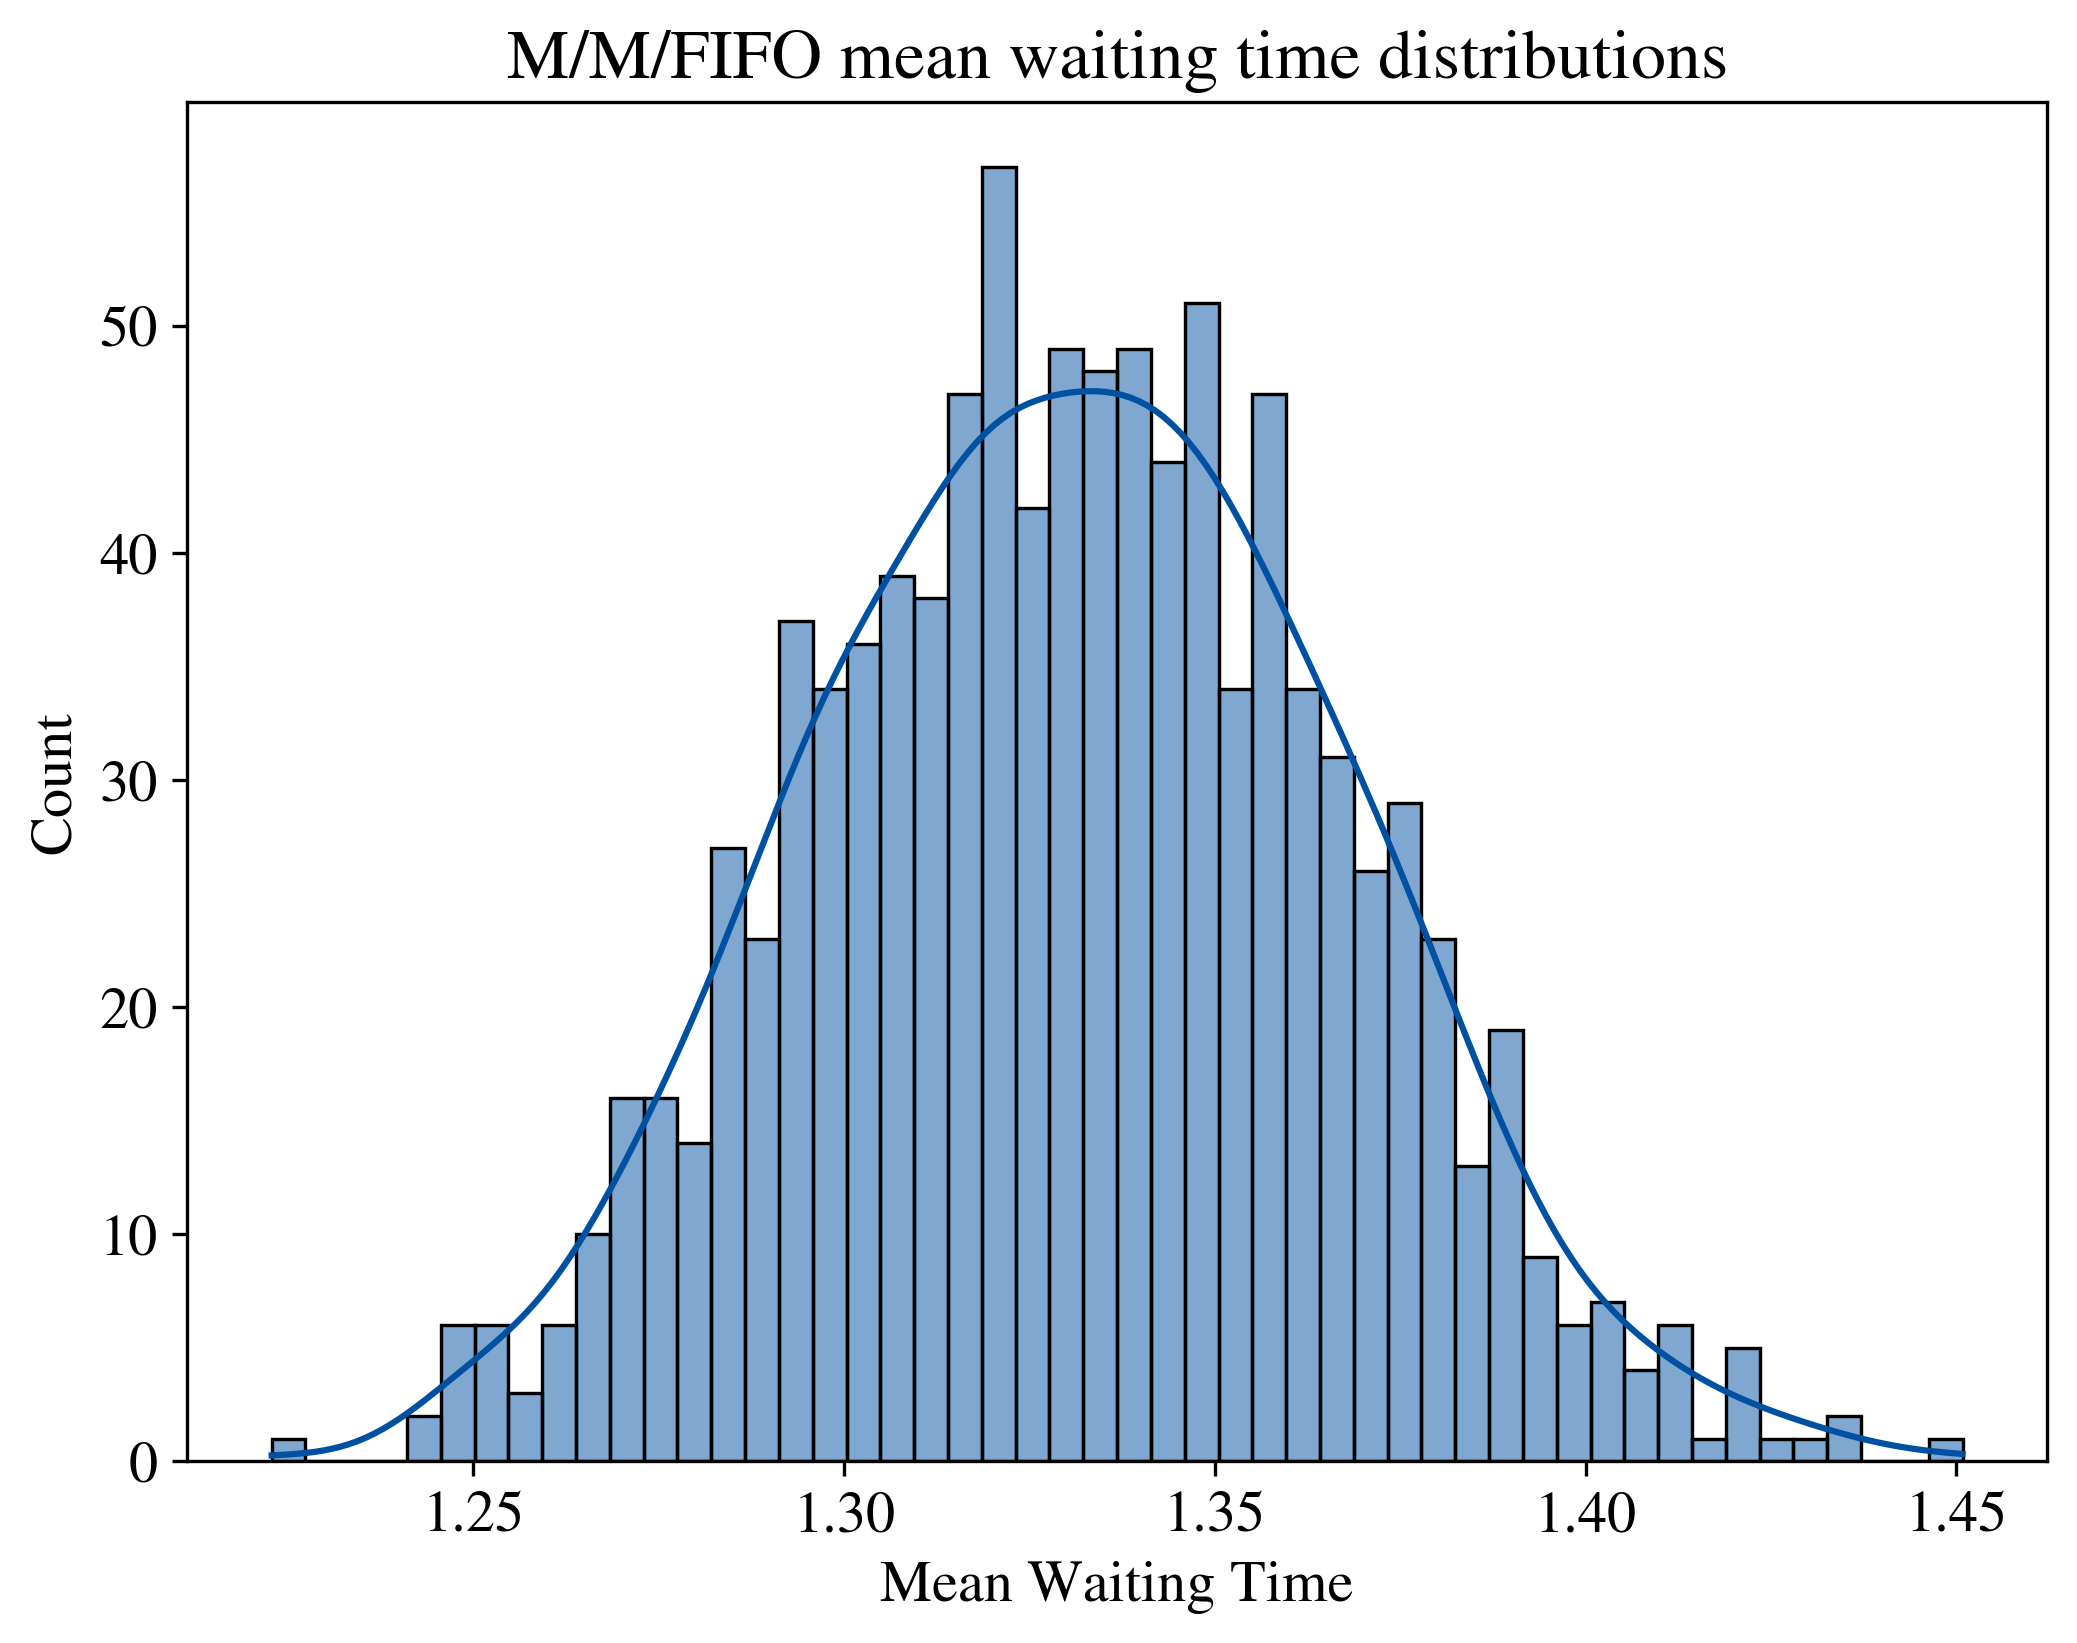

In [55]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax1 = fig.add_subplot(111, axisbelow=True)
ax = sns.histplot(ax=ax1, x=means_1server, color='#0051a2' ,bins=50, kde=True)
plt.title('M/M/FIFO mean waiting time distributions')
plt.xlabel('Mean Waiting Time')
plt.show()
fig.savefig("figures/hist_kde_compare.pdf")

In [60]:
np.mean(means_2server)

0.3803241687415982

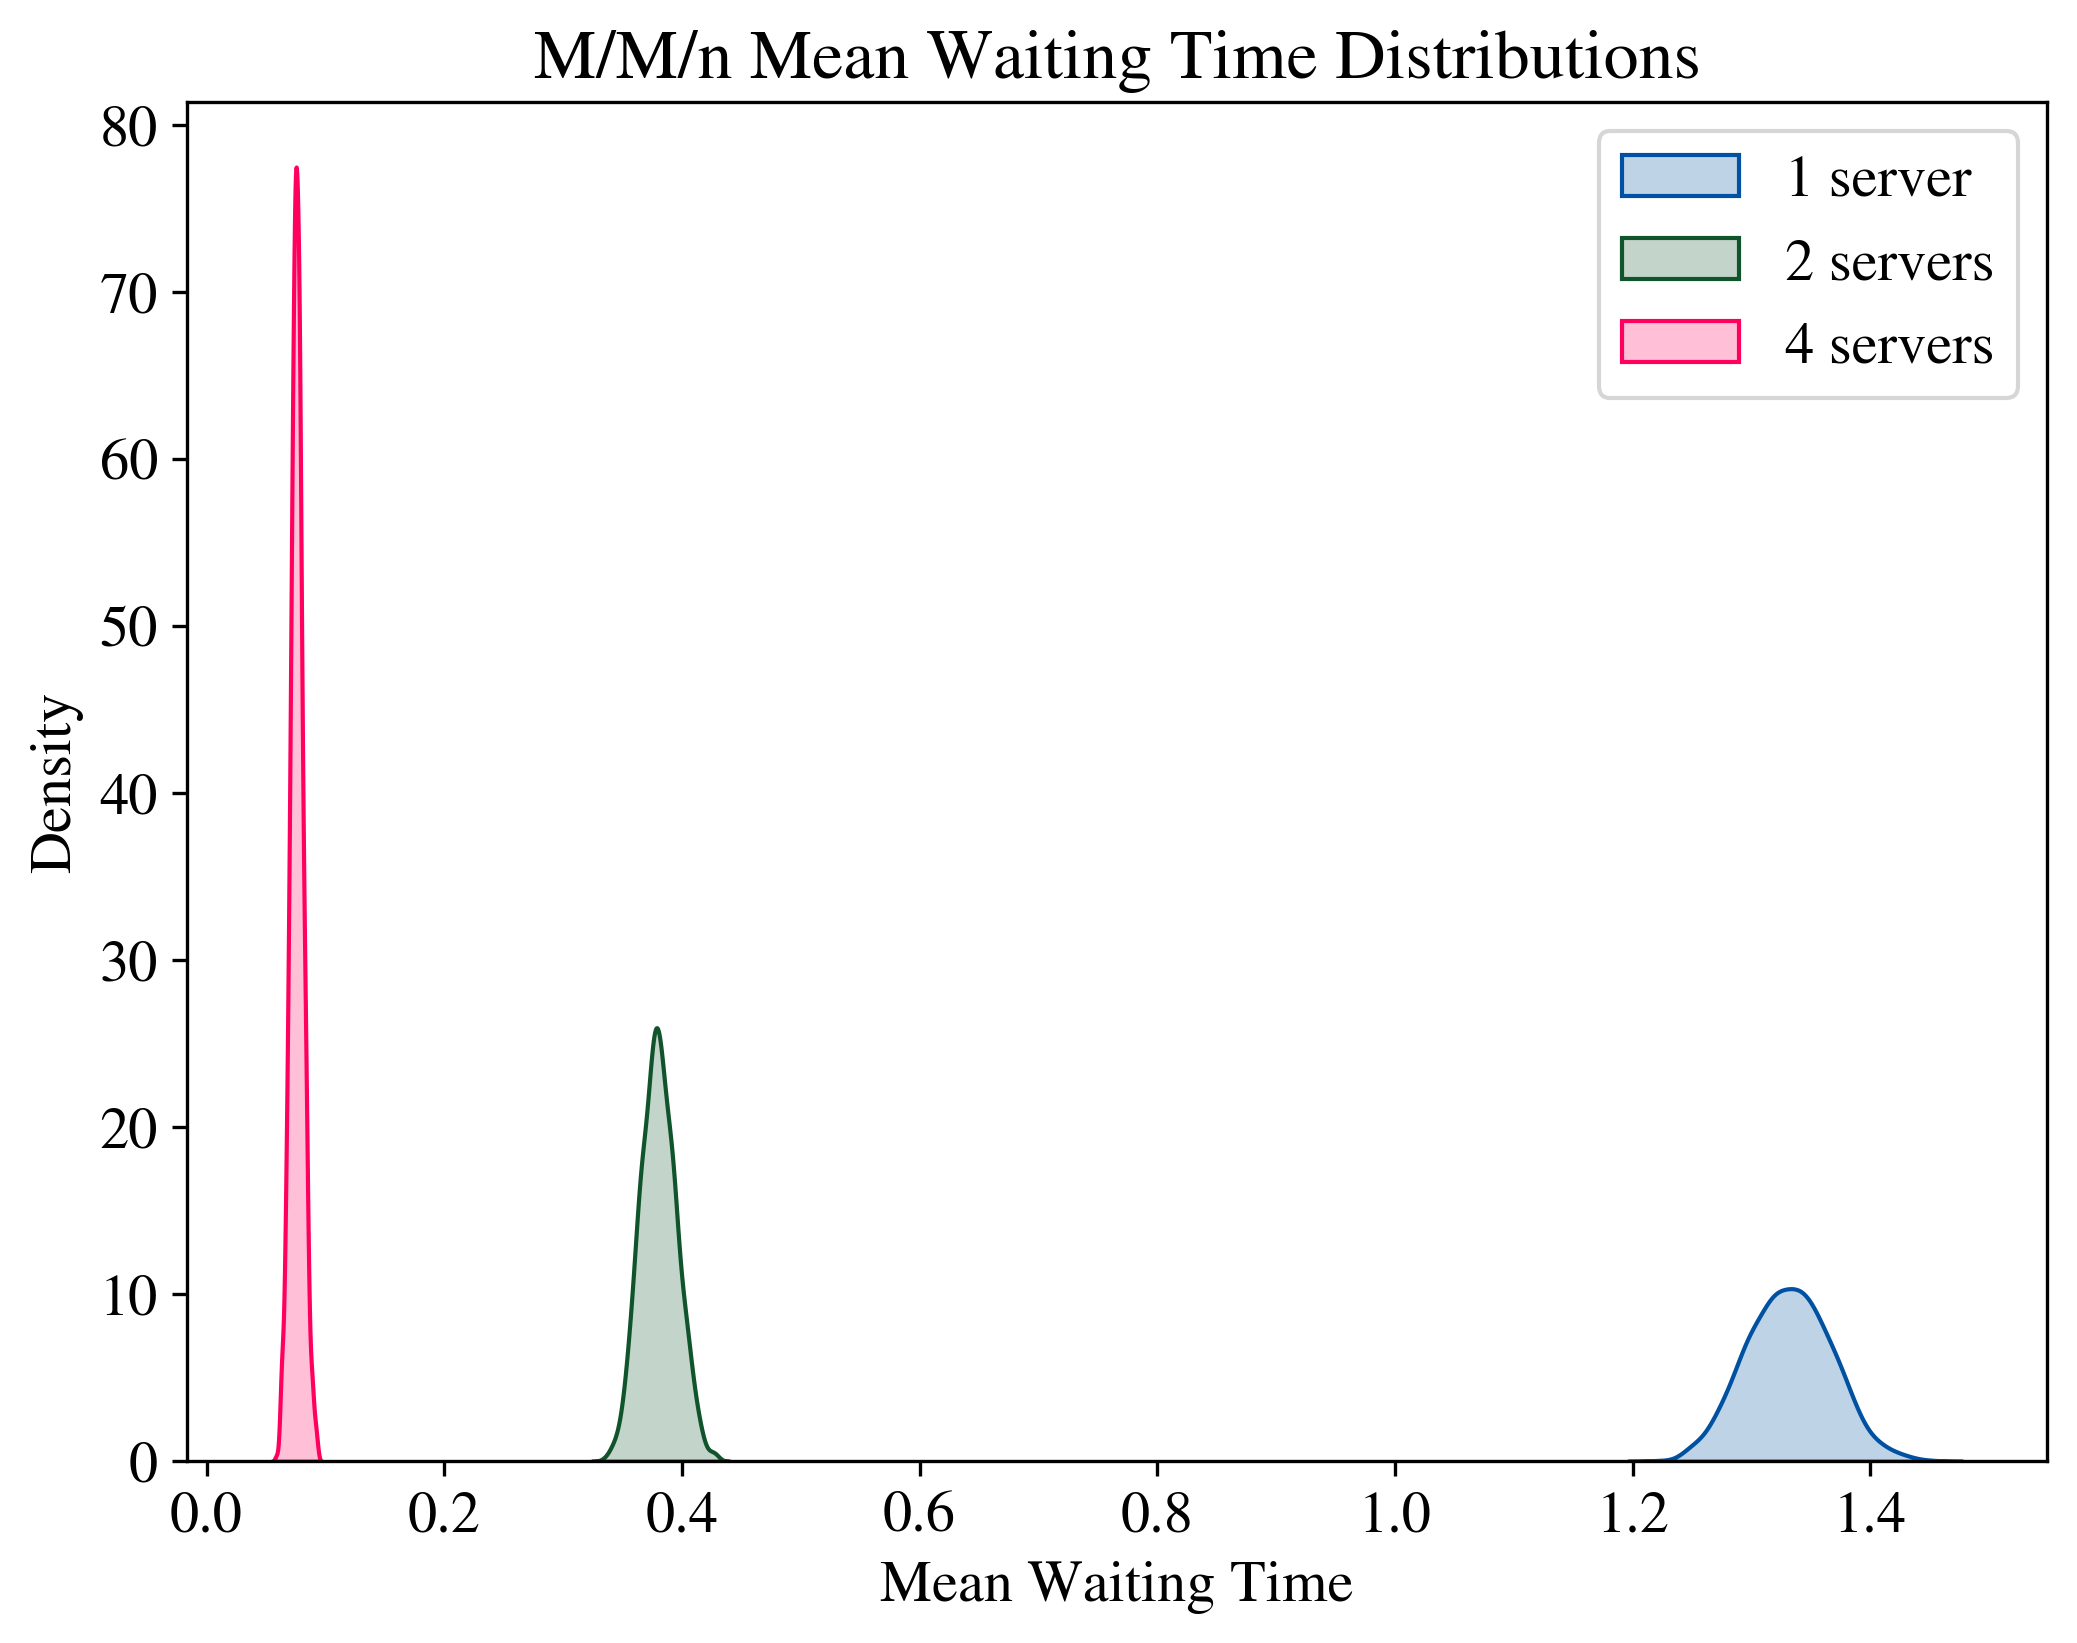

In [61]:
# COMPARING THE DISTRIBUTIONS of n = 1, 2, 4 servers
# plotting the distributions (using kde) in one figure 
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(means_1server, shade=True, color="#0051a2", label='1 server')
ax = sns.kdeplot(means_2server, shade=True, color="#10542c", label='2 servers')
ax = sns.kdeplot(means_4server, shade=True, color="#ff005e", label='4 servers')
plt.xlabel('Mean Waiting Time')
plt.title('M/M/n Mean Waiting Time Distributions')
plt.legend()
plt.show()
fig.savefig("figures/FIFO_distr.pdf")

### Interpretation of distributions
Increasing the number of servers for M/M/n problems leads to a mean lower waiting time. In addition, standard deviation around the mean is lower. All three distributions show a somewhat fat right tail, meaning high waiting times sometimes. However, tails are longer and fatter for less servers (i.e. 1 server shows fatter right tail than 2 servers, and in turn, 2 servers shows fatter right tail than 4 servers.)

In [12]:
#### ANSWER TO QUESTION 2.1 

# test if the mean waiting times for three different server groups are different, i.e. n = 1, 2, 4 
# are statistically significantly different
print(st.normaltest(means_4server))
print('Test for different means (ANOVA): ', st.f_oneway(means_1server, means_2server, means_4server))
print('Kruskal: ', st.kruskal(means_1server, means_2server, means_4server))

# we also want to test if the mean waiting times are different between 2 servers, i.e.
print('1 server vs. 4 servers: ', st.ttest_ind(means_1server, means_4server))
print('1 server vs. 2 servers: ', st.ttest_ind(means_1server, means_2server))
print('2 servers vs. 4 servers: ', st.ttest_ind(means_2server, means_4server))

NormaltestResult(statistic=176.5467596081533, pvalue=4.606363986455013e-39)
Test for different means (ANOVA):  F_onewayResult(statistic=499.60221523871735, pvalue=6.156381483692778e-167)
Kruskal:  KruskalResult(statistic=874.4913039946696, pvalue=1.2782803160470791e-190)
1 server vs. 4 servers:  Ttest_indResult(statistic=28.027125652448696, pvalue=5.73099762098708e-128)
1 server vs. 2 servers:  Ttest_indResult(statistic=17.012613622539835, pvalue=3.460091550364469e-57)
2 servers vs. 4 servers:  Ttest_indResult(statistic=18.655621980935923, pvalue=7.281372710397582e-67)


### Interpretation of statistical tests:
Mean waiting times for different servers, i.e. n = 1,2,4 are significantly different at 1% (ANOVA test result). Also comparing the waiting times between two servers leads results in statistically significant differences between the means (at 1% level).

### Same analysis for SJF (Q3)

In [13]:
sjf_simulator1 = queuSim(capacity=1, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, helpStrat = "SJF")
sjf_simulator2 = queuSim(capacity=2, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, helpStrat = "SJF")
sjf_simulator4 = queuSim(capacity=4, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, helpStrat = "SJF")
# waitTimesX contain a list with sublists where each sublist contains all the customer waiting times
# of one simulation
sjf_waitTimes1 = sjf_simulator1.runSim()
sjf_waitTimes2 = sjf_simulator2.runSim()
sjf_waitTimes4 = sjf_simulator4.runSim()
# we compute the mean waiting times per simulation and store them in a list
sjf_means_1server = []
for sim in sjf_waitTimes1:
    sjf_means_1server.append(np.mean(sim))

sjf_means_2server = []
for sim in sjf_waitTimes2:
    sjf_means_2server.append(np.mean(sim))

sjf_means_4server = []
for sim in sjf_waitTimes4:
    sjf_means_4server.append(np.mean(sim))

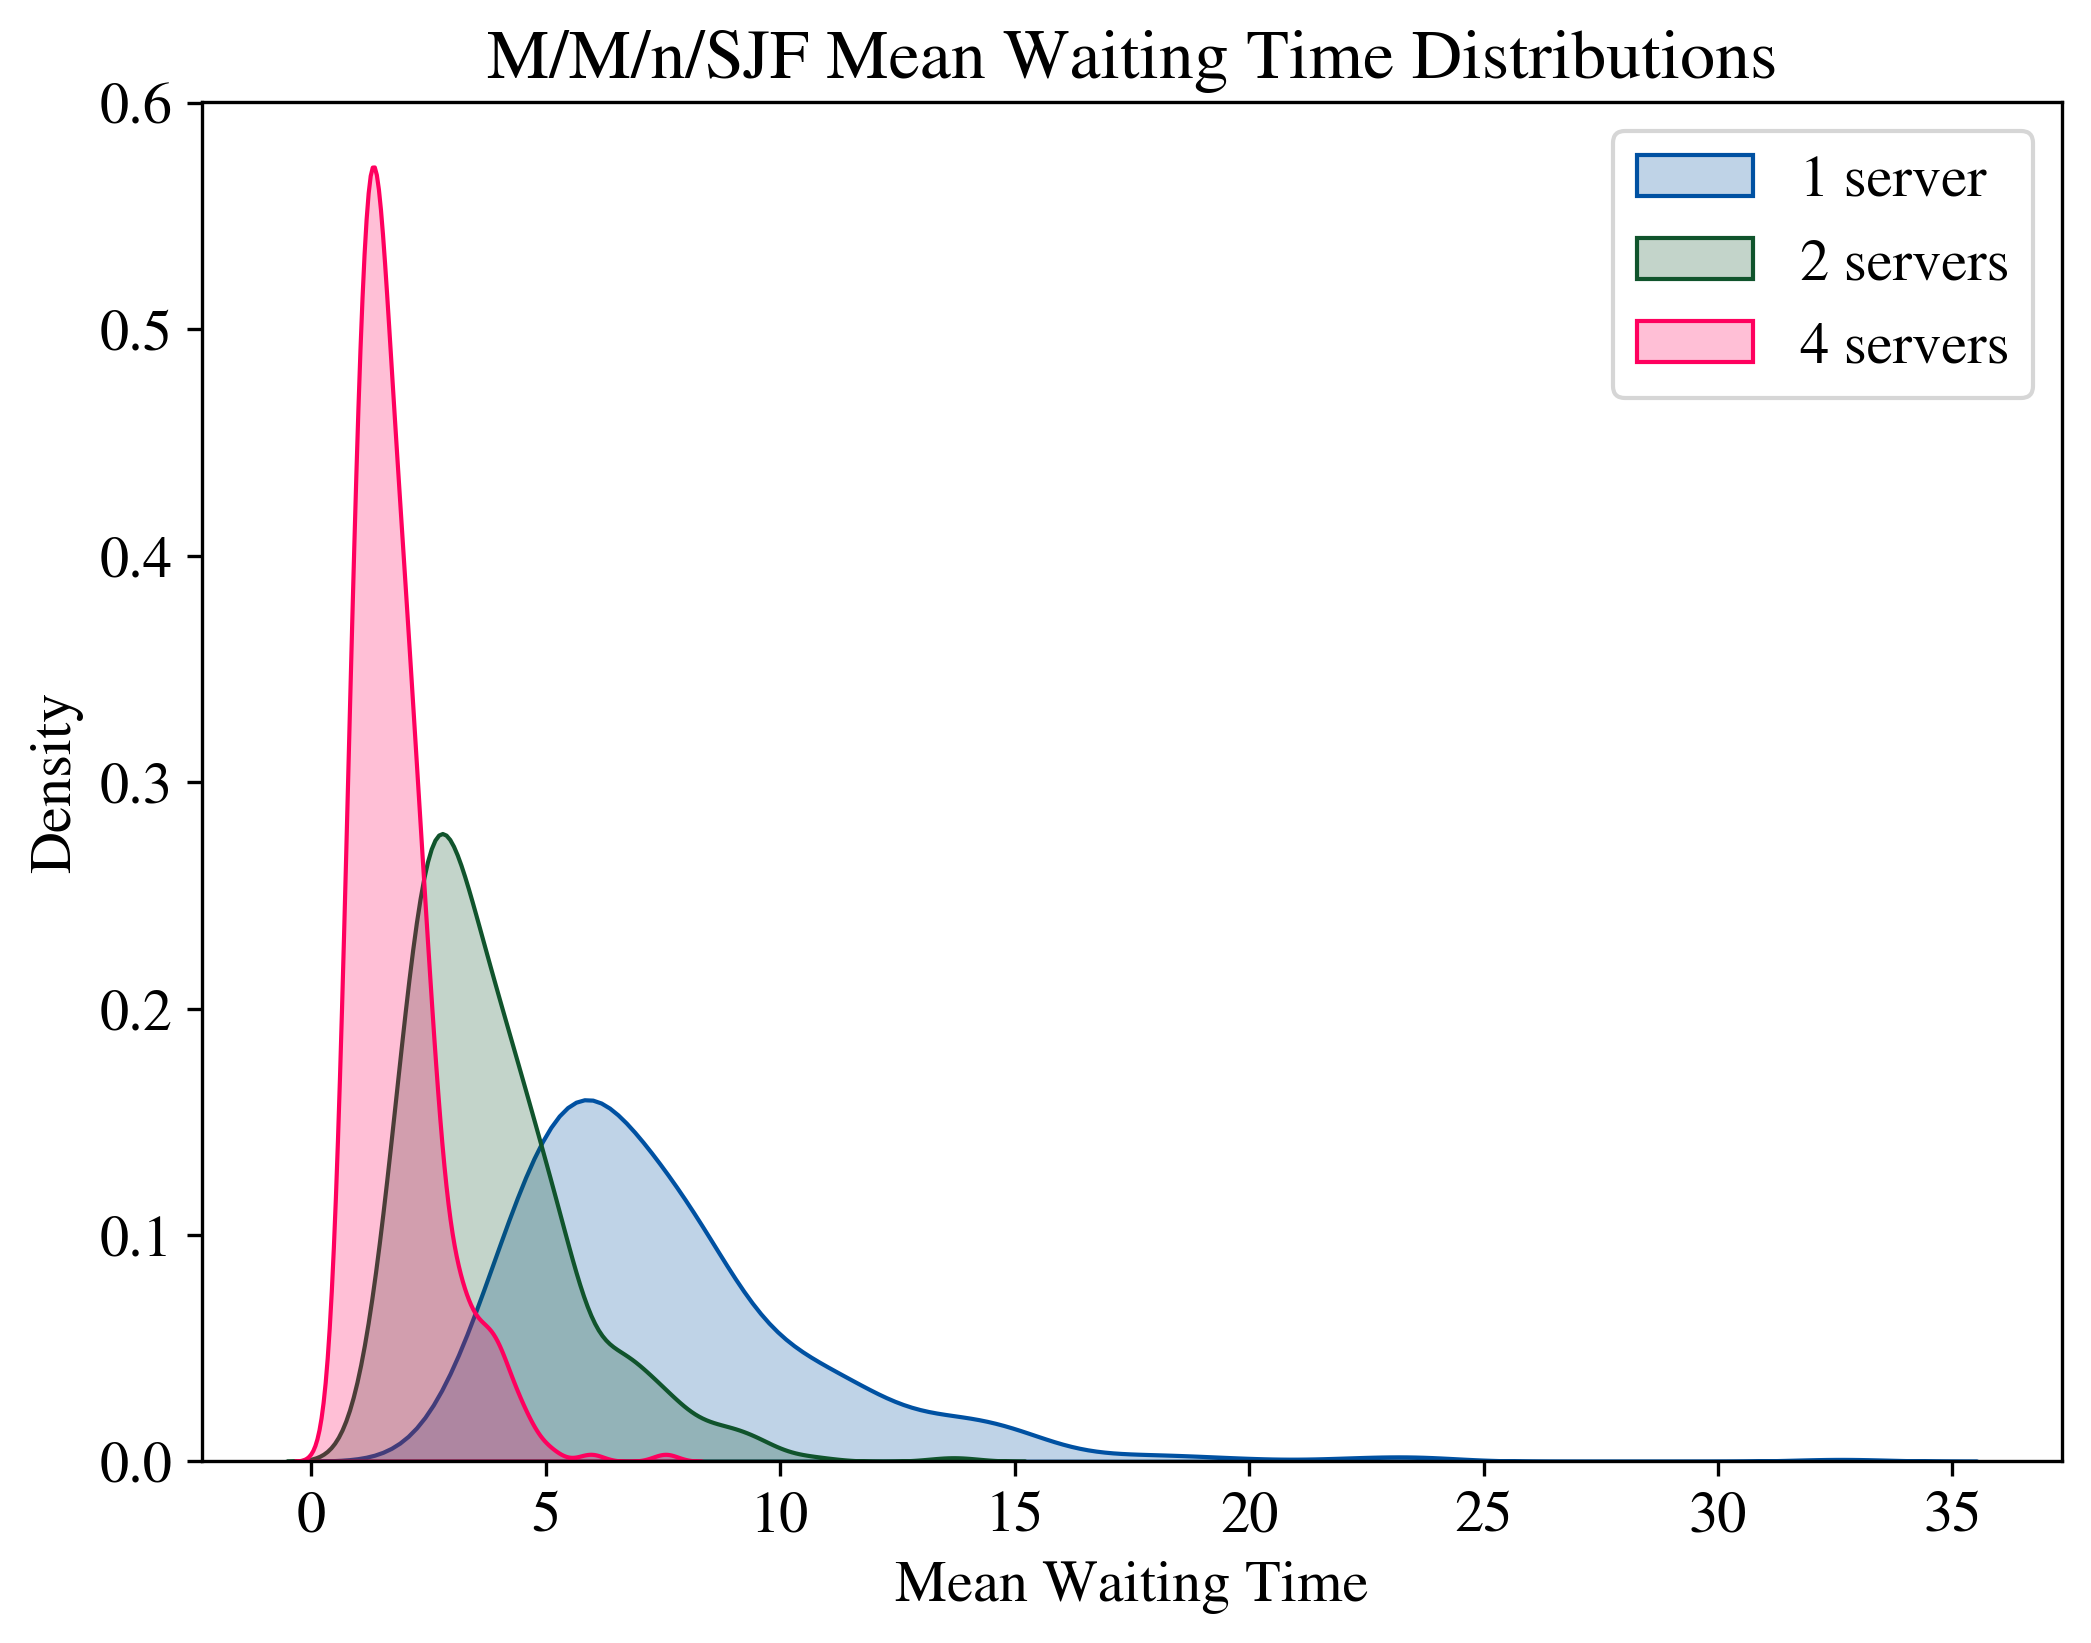

In [14]:
# COMPARING THE DISTRIBUTIONS of n = 1, 2, 4 servers for SJF 
# plotting the distributions (using kde) in one figure 
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(sjf_means_1server, shade=True, color="#0051a2", label='1 server')
ax = sns.kdeplot(sjf_means_2server, shade=True, color="#10542c", label='2 servers')
ax = sns.kdeplot(sjf_means_4server, shade=True, color="#ff005e", label='4 servers')
plt.xlabel('Mean Waiting Time')
plt.title('M/M/n/SJF Mean Waiting Time Distributions')
plt.legend()
plt.show()
fig.savefig("figures/sjf_distribution.pdf")


### Let's now compare distributions for SJF vs. FIFO for a given number of n servers


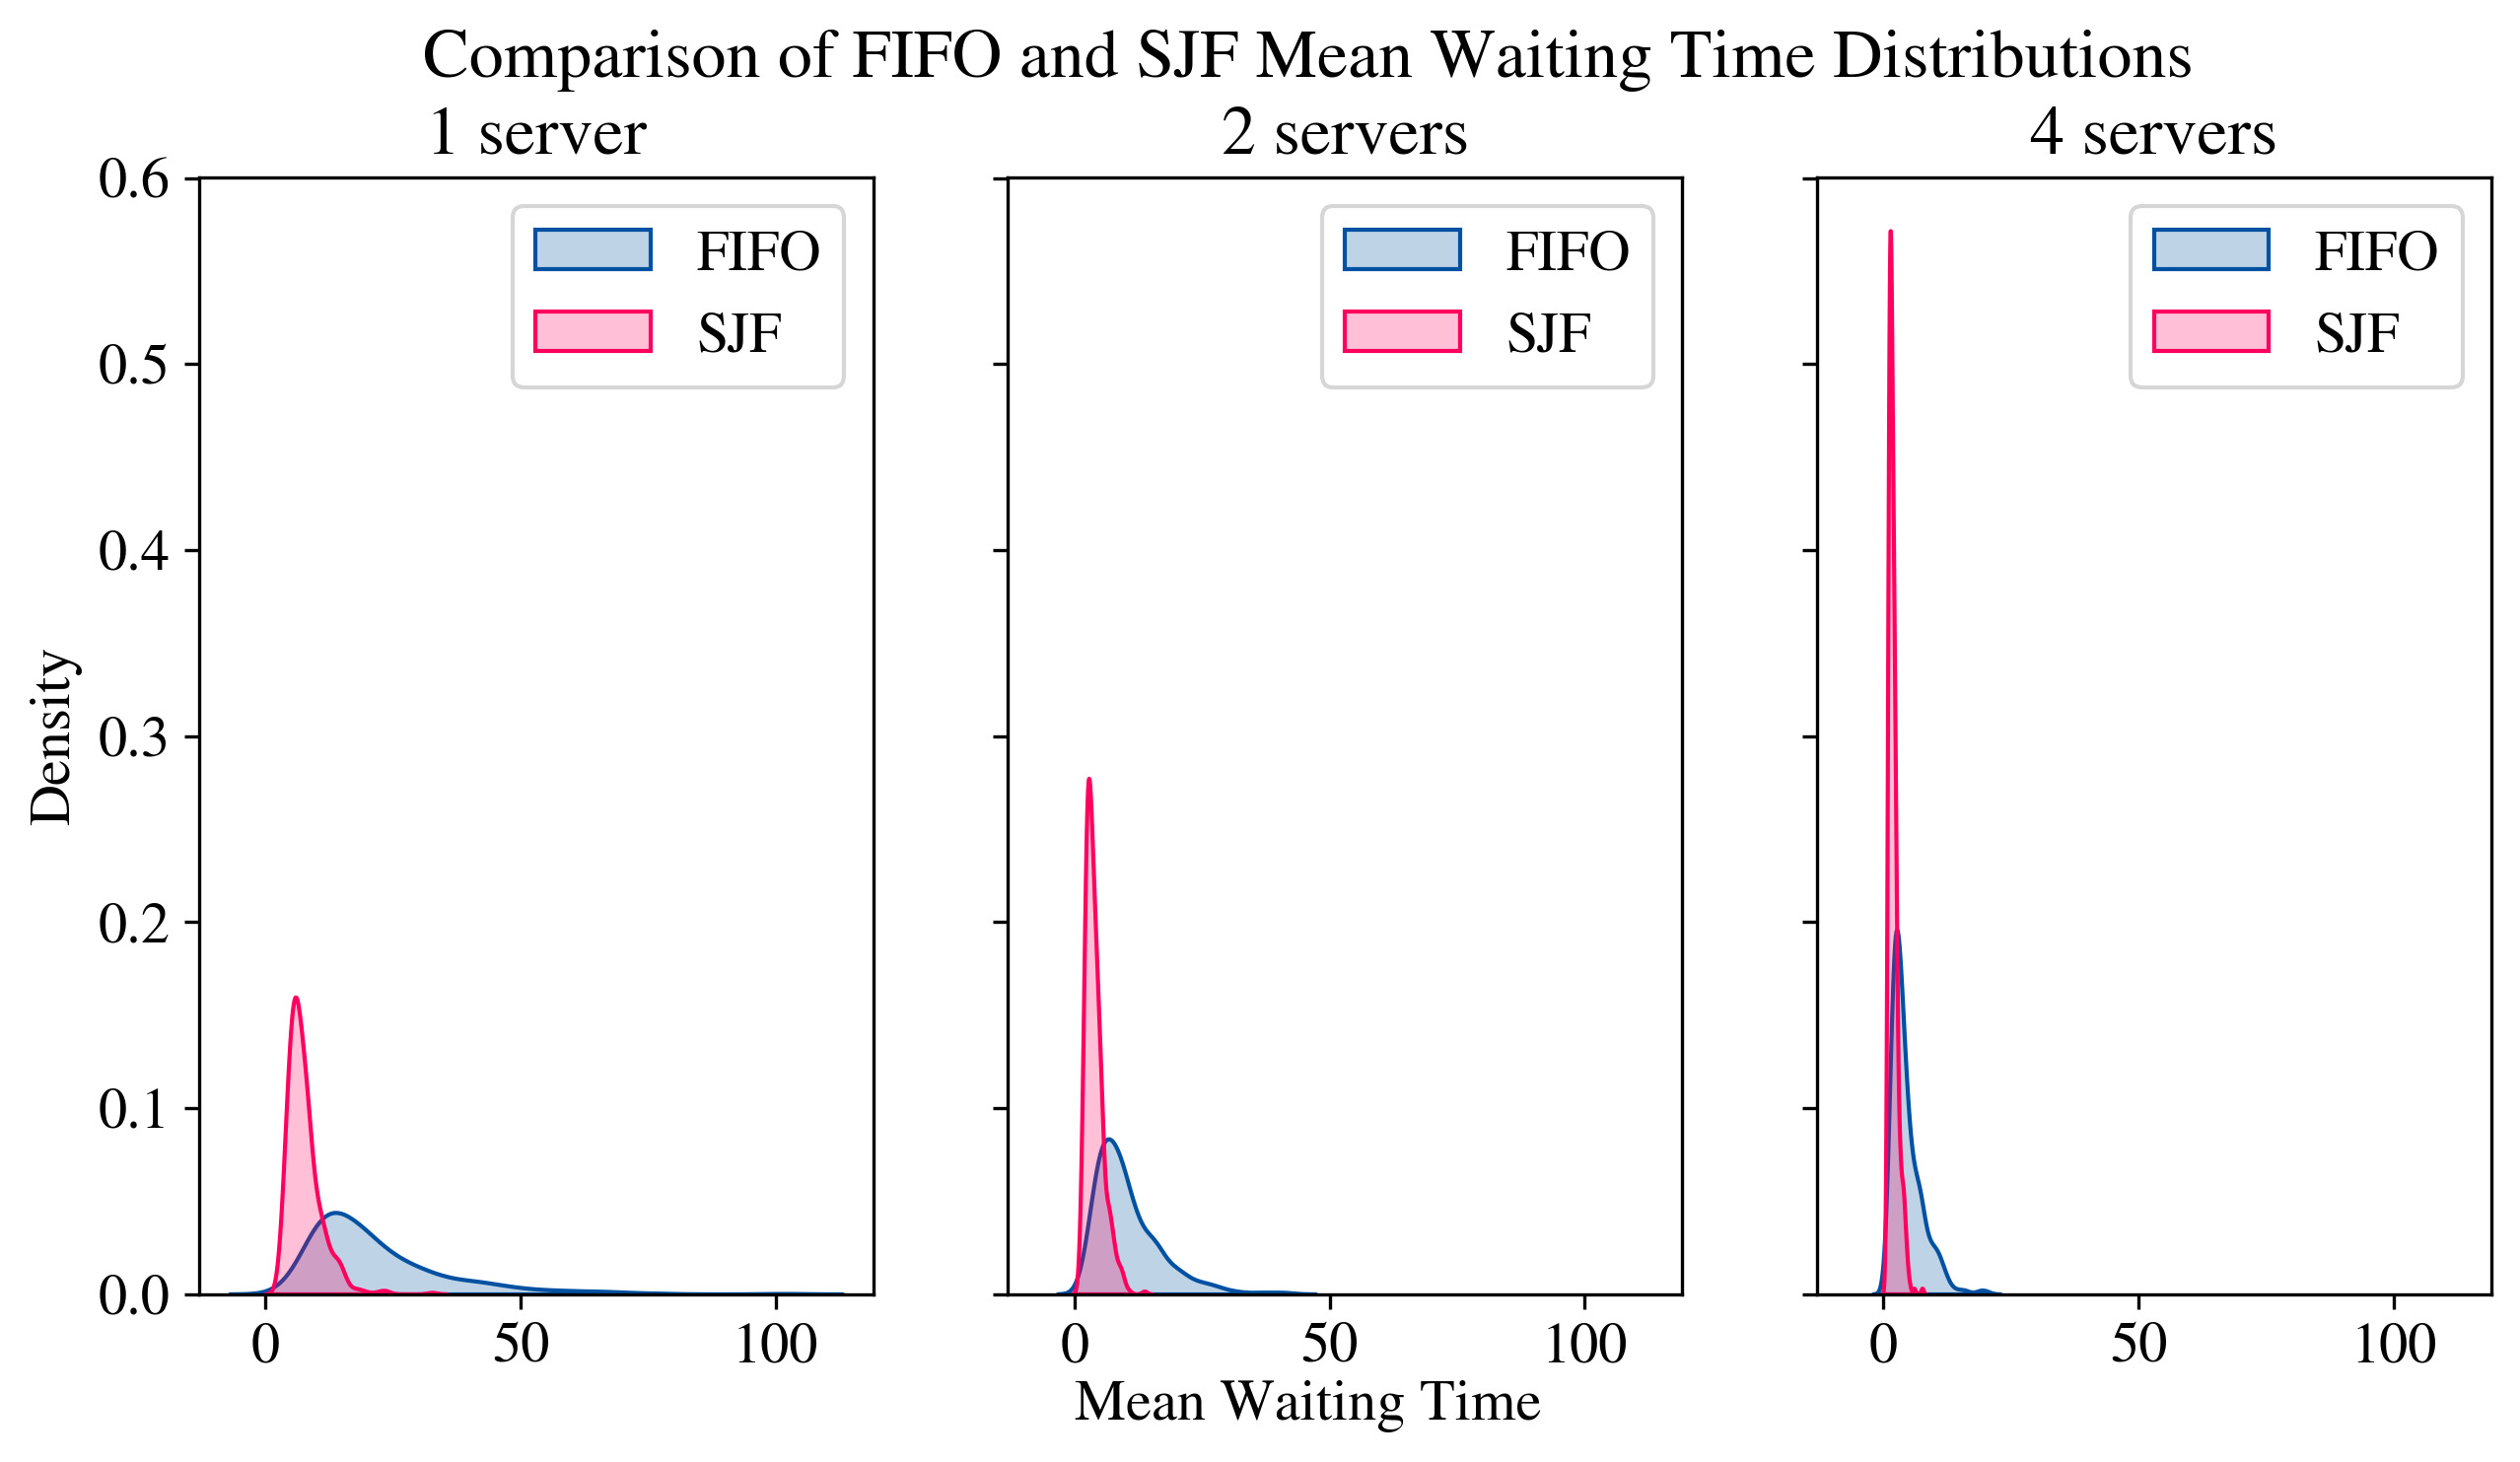

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), dpi=300, sharey=True, sharex=True)
sns.kdeplot(ax=ax1, x=means_1server, shade=True, color="#0051a2", label='FIFO')
sns.kdeplot(ax=ax1, x=sjf_means_1server, shade=True, color="#ff005e", label='SJF')

sns.kdeplot(ax=ax2, x=means_2server, shade=True, color="#0051a2", label='FIFO')
sns.kdeplot(ax=ax2, x=sjf_means_2server, shade=True, color="#ff005e", label='SJF')

sns.kdeplot(ax=ax3, x=means_4server, shade=True, color="#0051a2", label='FIFO')
sns.kdeplot(ax=ax3, x=sjf_means_4server, shade=True, color="#ff005e", label='SJF')

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title('1 server')
ax2.set_title('2 servers')
ax3.set_title('4 servers')
fig.suptitle('Comparison of FIFO and SJF Mean Waiting Time Distributions')
fig.text(0.5, 0.04,  'Mean Waiting Time', ha='center')
plt.show()
fig.savefig("figures/distrubutionsSJFFIFO.pdf")

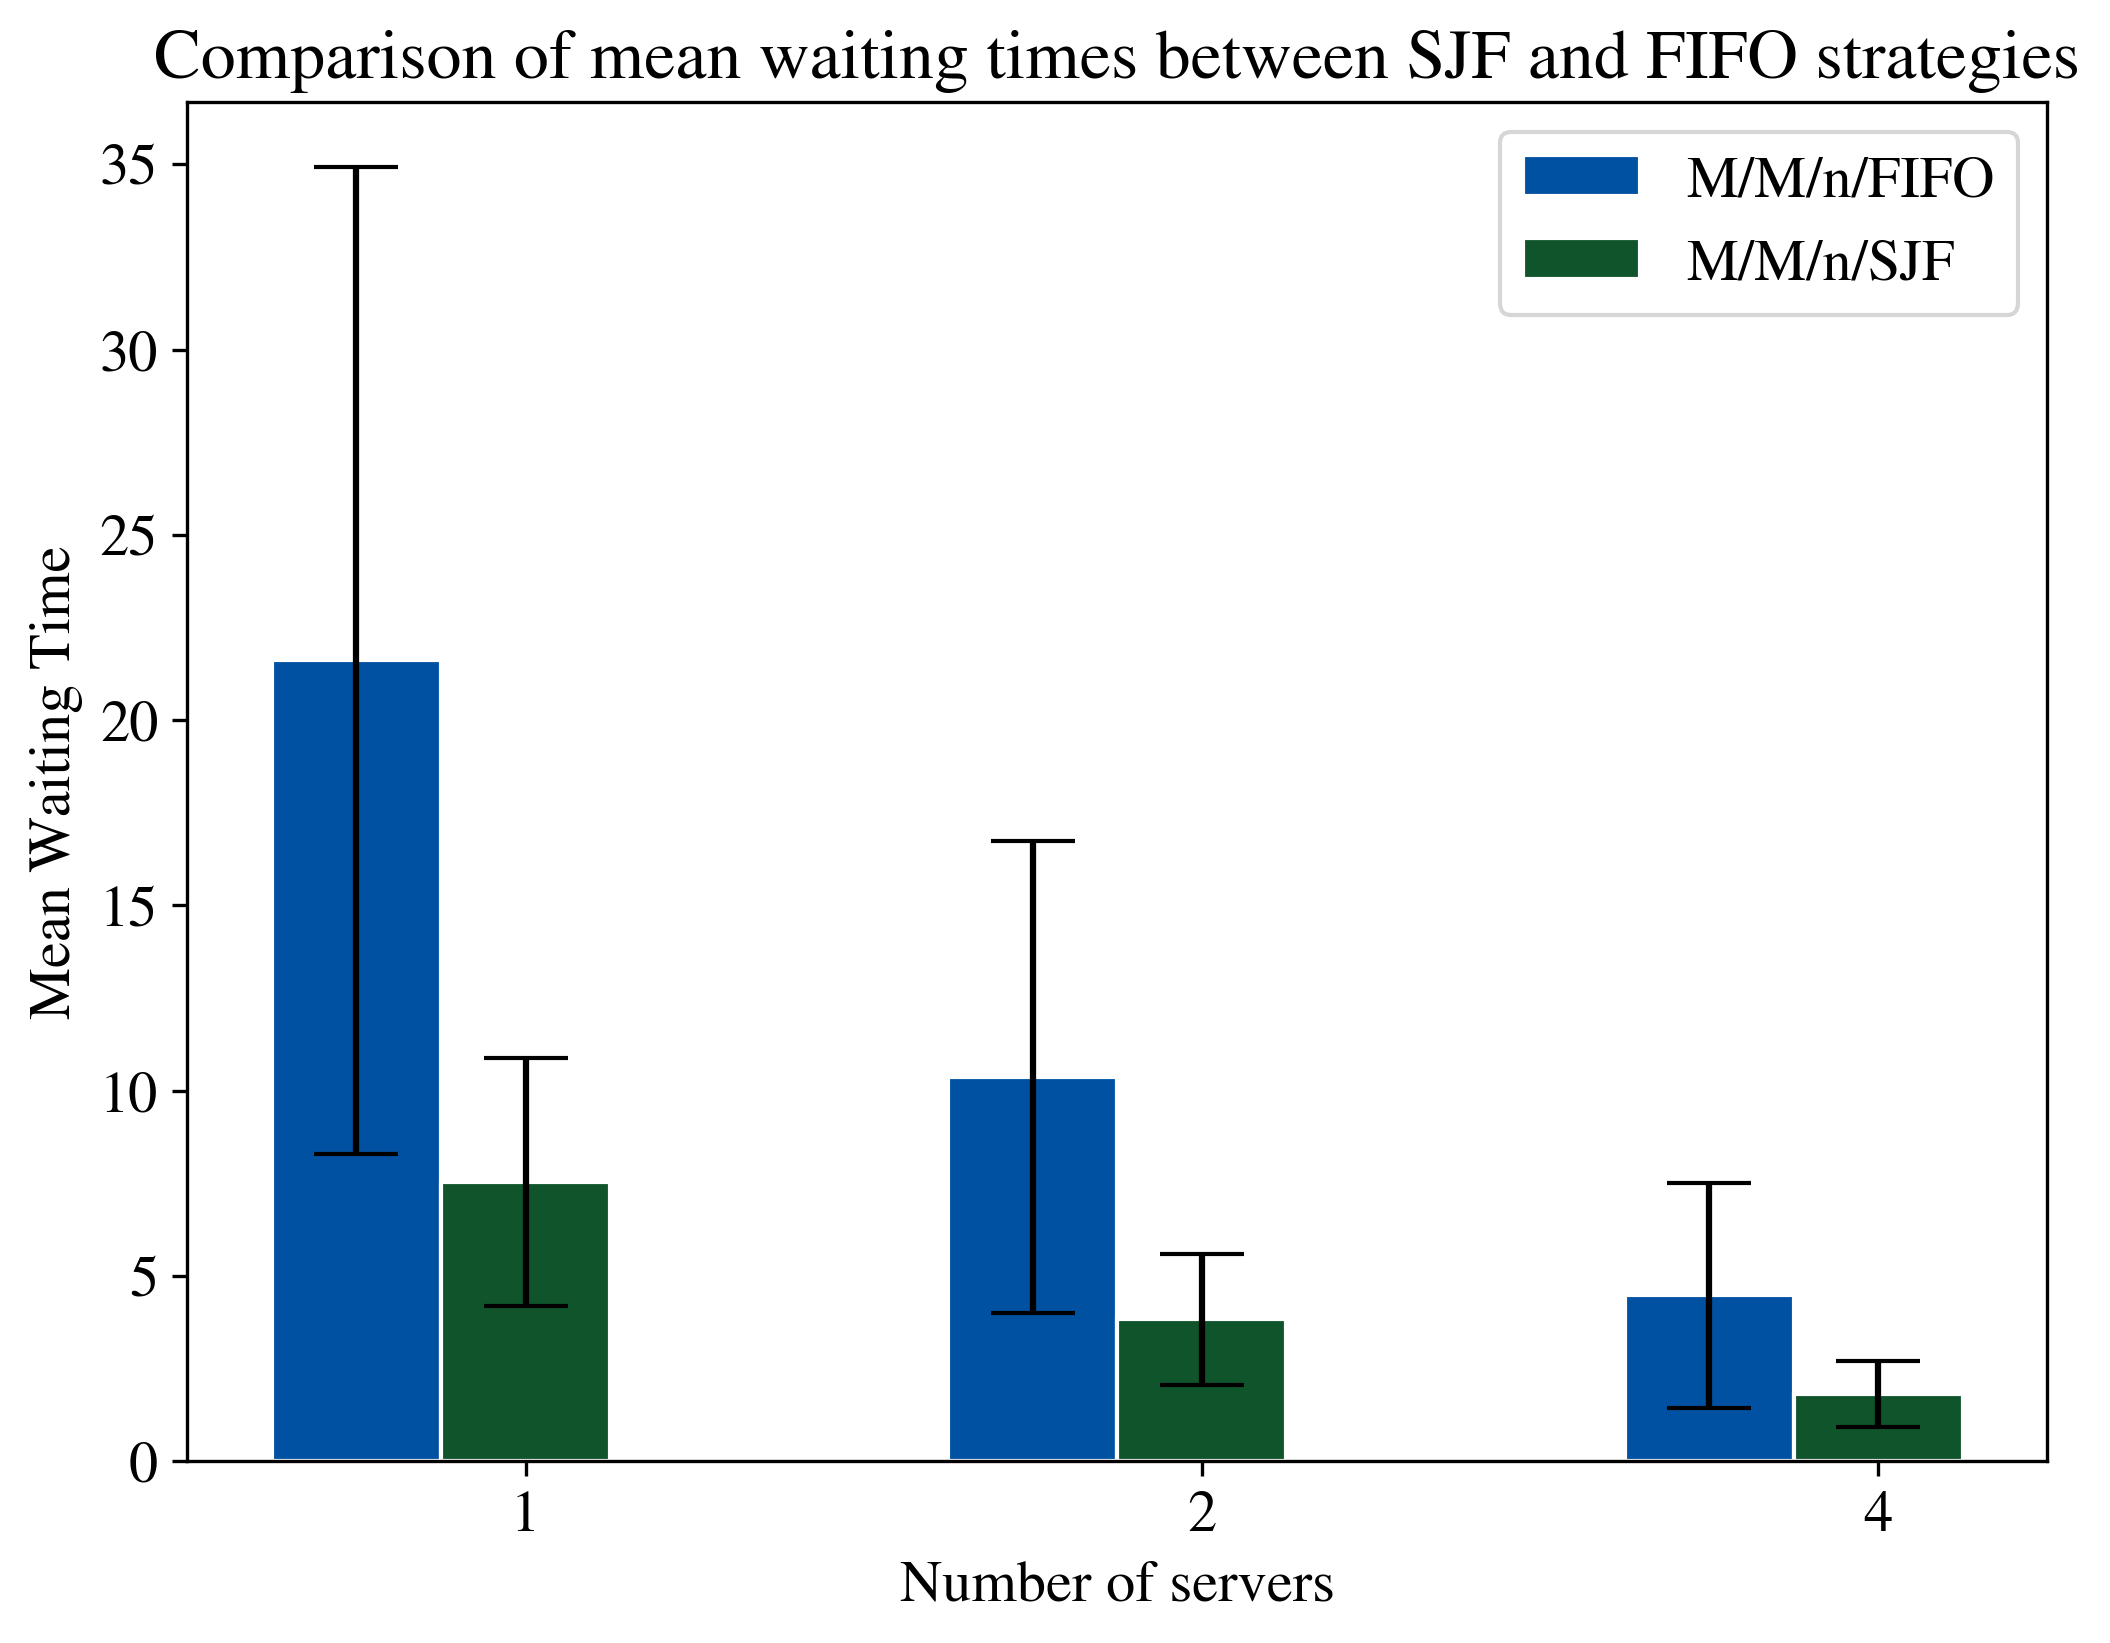

In [16]:
# ANSWER TO QUESTION 3.1 
# This is the best answer
# Comparing means

 # set width of bars
barWidth = 0.25

bar1 = [np.mean(means_1server), np.mean(means_2server), np.mean(means_4server)]
bar2 = [np.mean(sjf_means_1server), np.mean(sjf_means_2server), np.mean(sjf_means_4server)]

err1 = [np.std(means_1server), np.std(means_2server), np.std(means_4server)]
err2 = [np.std(sjf_means_1server), np.std(sjf_means_2server), np.std(sjf_means_4server)]

# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar1, yerr = err1,color="#0051a2", width=barWidth, edgecolor='white', label='M/M/n/FIFO', capsize=10)
ax.bar(r2, bar2, yerr = err2, color="#10542c", width=barWidth, edgecolor='white', label='M/M/n/SJF', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Waiting Time')
plt.xlabel('Number of servers')
plt.xticks([r + barWidth for r in range(3)], [1,2,4])
 
# Create legend & Show graphic
plt.legend()
plt.title('Comparison of mean waiting times between SJF and FIFO strategies')
plt.show()
fig.savefig("figures/barplotSJFFIFO.pdf")


In [17]:
# ANSWER TO QUESTION 3.1 
# Testing for difference in means
# we also want to test if the mean waiting times are different between 2 servers, i.e.
print('1 server FIFO vs. SJF: ', st.ttest_ind(means_1server, sjf_means_1server))
print('2 servers FIFO vs. SJF: ', st.ttest_ind(means_2server, sjf_means_2server))
print('4 servers FIFO vs. SJF ', st.ttest_ind(means_4server, sjf_means_4server))

1 server FIFO vs. SJF:  Ttest_indResult(statistic=22.89635180485973, pvalue=1.3789884362290091e-93)
2 servers FIFO vs. SJF:  Ttest_indResult(statistic=22.097936577331097, pvalue=2.1152102452039375e-88)
4 servers FIFO vs. SJF  Ttest_indResult(statistic=18.695503932122953, pvalue=4.1863018576332667e-67)


### Interpretation of comparing mean waiting time FIFO vs. SJF
Based on above t-tests, mean waiting times are different under FIFO vs. SJF job-scheduling systems.

In [18]:
# ADJUSTED ANSWER TO 2.2 
# we want 1% significance level for each simulation
# 2.2, run multiple simulations for different p
# service time is fixed at 2 
# customer intervals gets scaled for the amount of servers
# p = 2/intervalcustomers
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []




for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=NUM_SIM, newCustomers = NUM_CUST, intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()

    results_1server = []
    std_1server = []
    for sim in result1:
        results_1server.append(np.mean(sim))

    results_2server = []
    std_2server = []
    for sim in result2:
        results_2server.append(np.mean(sim))

    results_4server = []
    std_4server = []
    for sim in result4:
        results_4server.append(np.mean(sim))

    means1.append(results_1server)
    means2.append(results_2server)
    means4.append(results_4server)

In [19]:
import random
all_res = []
num_sim = 100
for rho in range(len(means1)):
    res = []
    for i in range(num_sim):
        m1 = means1[rho]
        m2 = means2[rho]
        m4 = means4[rho]
        random.shuffle(m1)
        random.shuffle(m2)
        random.shuffle(m4)
        j = 2
        while (True):
            stat, pval = st.f_oneway(m1[0:j], m2[0:j], m4[0:j])
            if pval < 0.00000000005:
                res.append(j)
                break
            j+=1
    all_res.append(res)

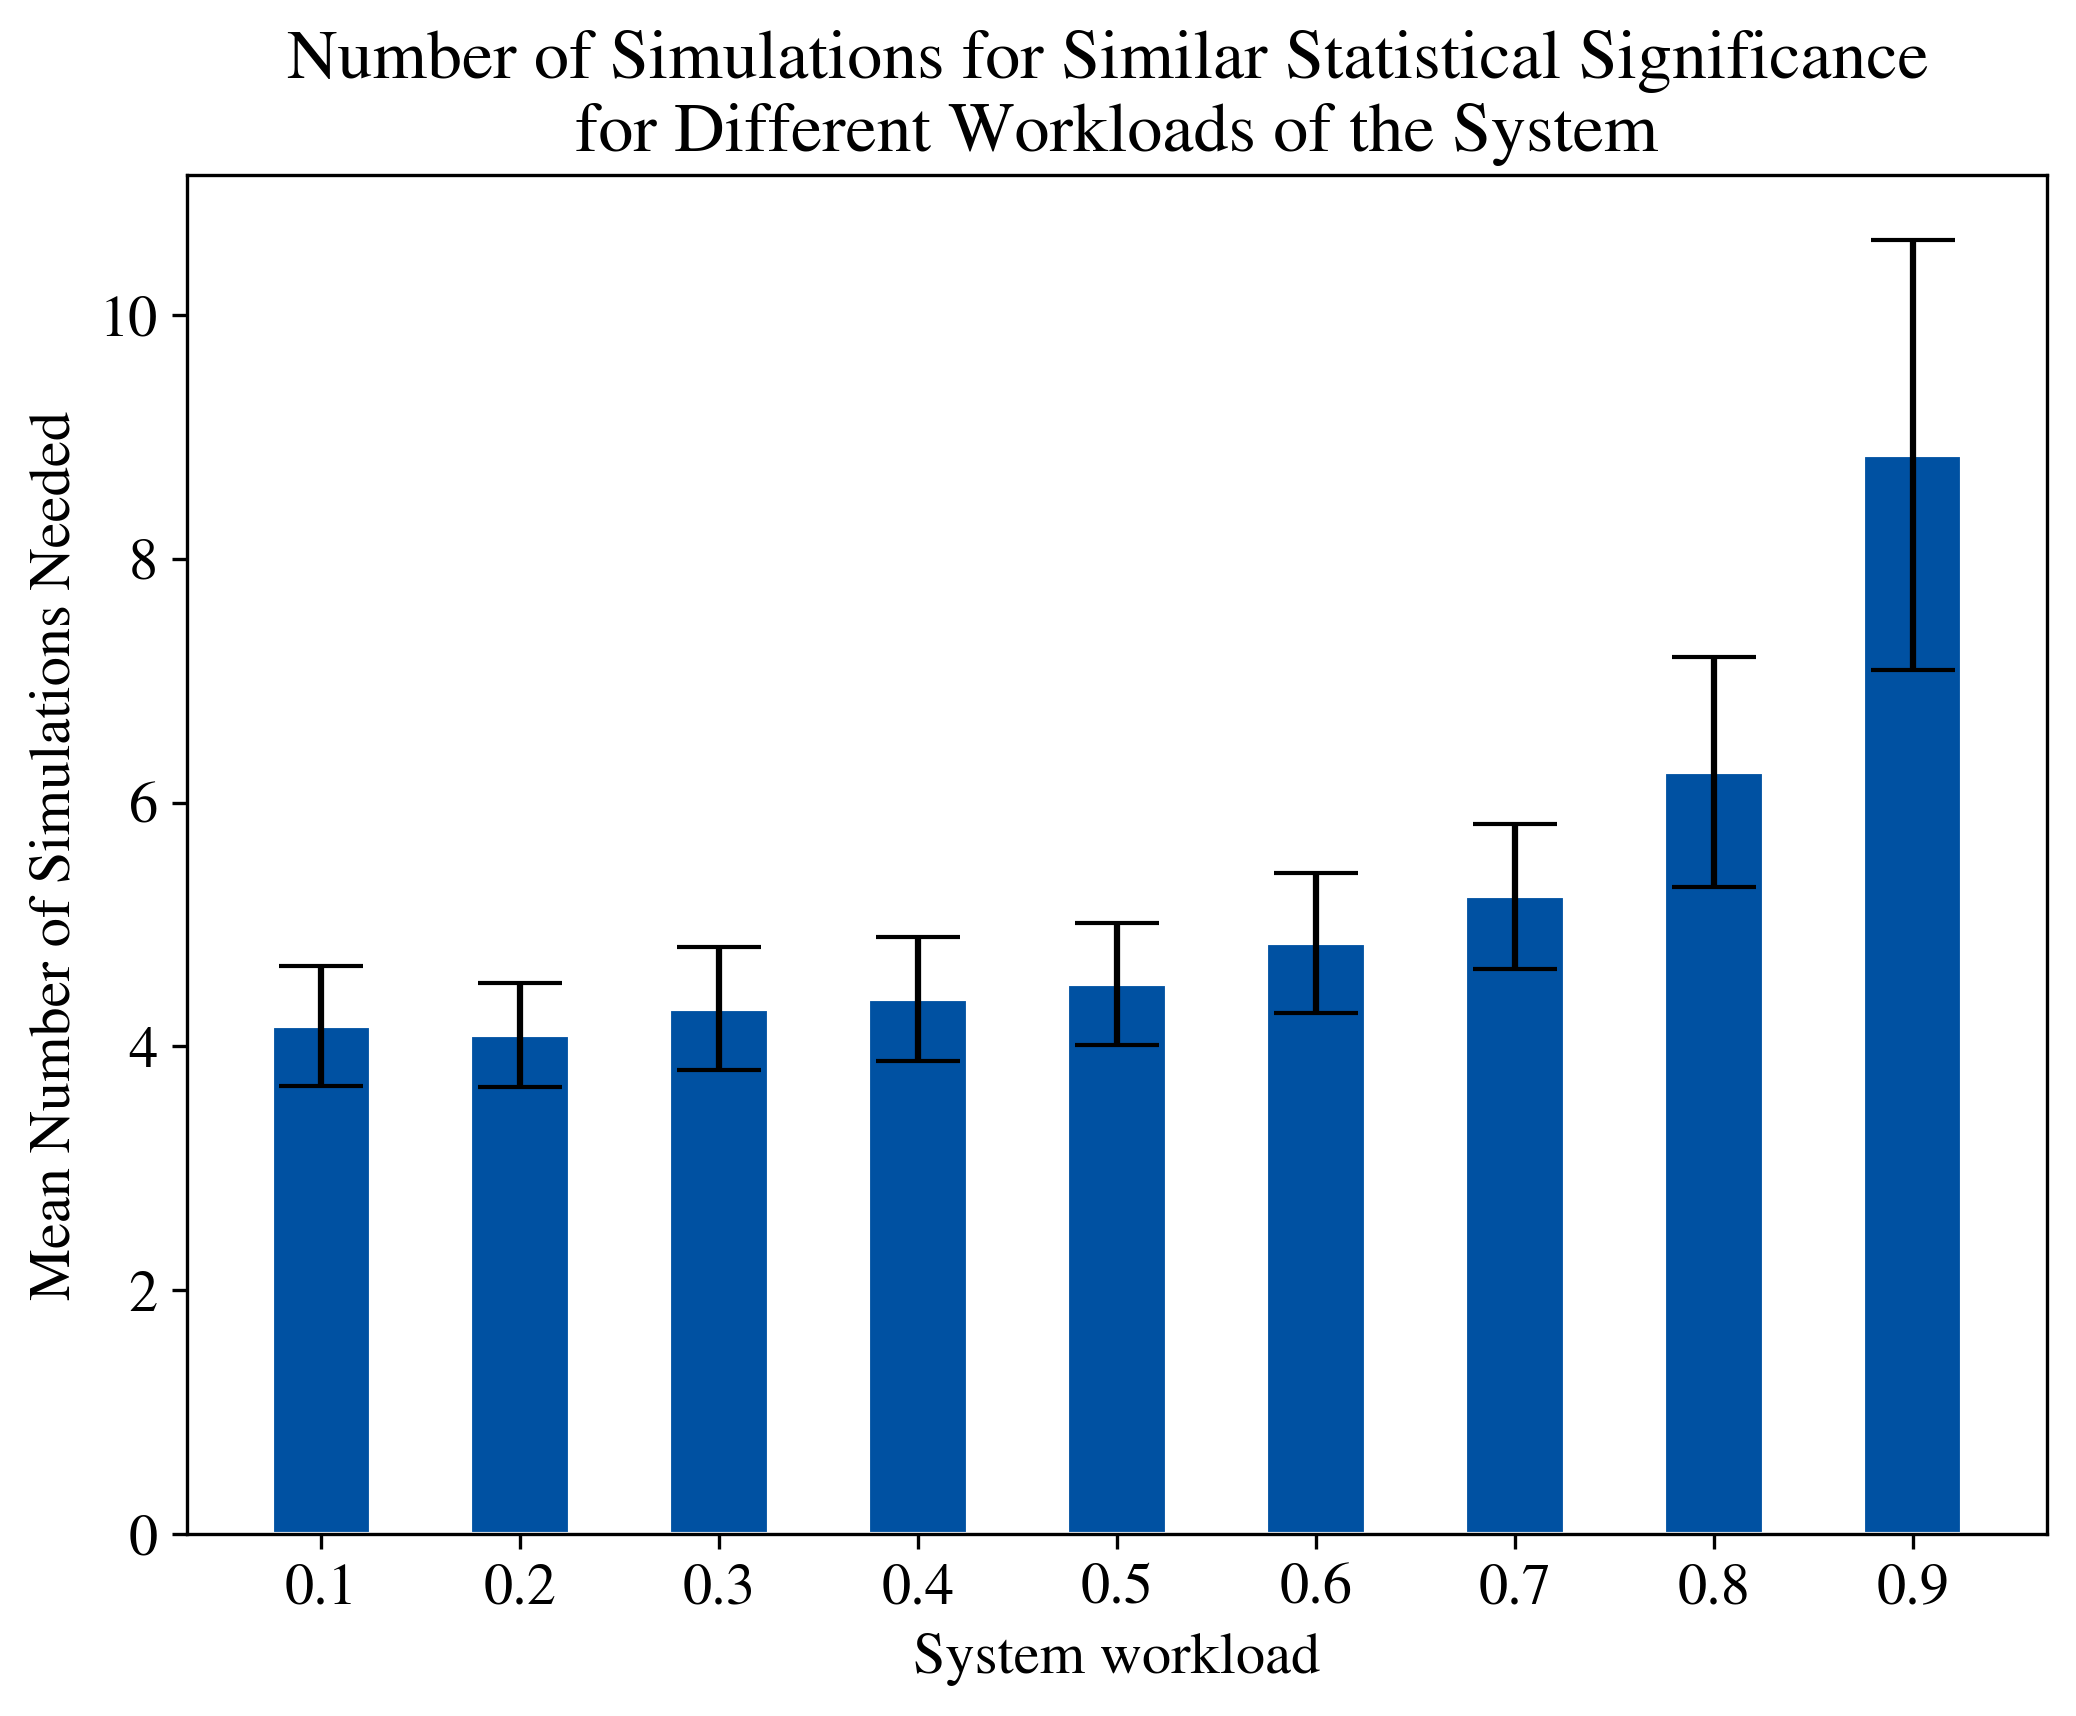

In [20]:
# ANSWER TO QUESTION 3.1 
# This is the best answer
# Comparing means

 # set width of bars
barWidth = 0.5
bar = [np.mean(all_res[i]) for i in range(len(all_res))]
err = [np.std(all_res[i]) for i in range(len(all_res))]


# Set position of bar on X axis
r1 = np.arange(9)

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar, yerr = err, color="#0051a2", width=barWidth, edgecolor='white', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Number of Simulations Needed')
plt.xlabel('System workload')
plt.title('Number of Simulations for Similar Statistical Significance \nfor Different Workloads of the System')
plt.xticks([r for r in range(len(all_res))], rhoVals)

 
# Create legend & Show graphic
plt.show()
fig.savefig("figures/barplotWorkloads.pdf")

In [21]:
Anova_results = []
ttest_14_results = []
ttest_12_results = []
ttest_24_results = []
for i in range(len(means1)):
    stat, pval = st.f_oneway(means1[i], means2[i], means4[i])
    Anova_results.append(stat)
    stat, pval = st.ttest_ind(means1[i], means4[i])
    ttest_14_results.append(stat)
    stat, pval = st.ttest_ind(means1[i], means2[i])
    ttest_12_results.append(stat)
    stat, pval = st.ttest_ind(means2[i], means4[i])
    ttest_24_results.append(stat)
print(pval)

1.2556686075184129e-294


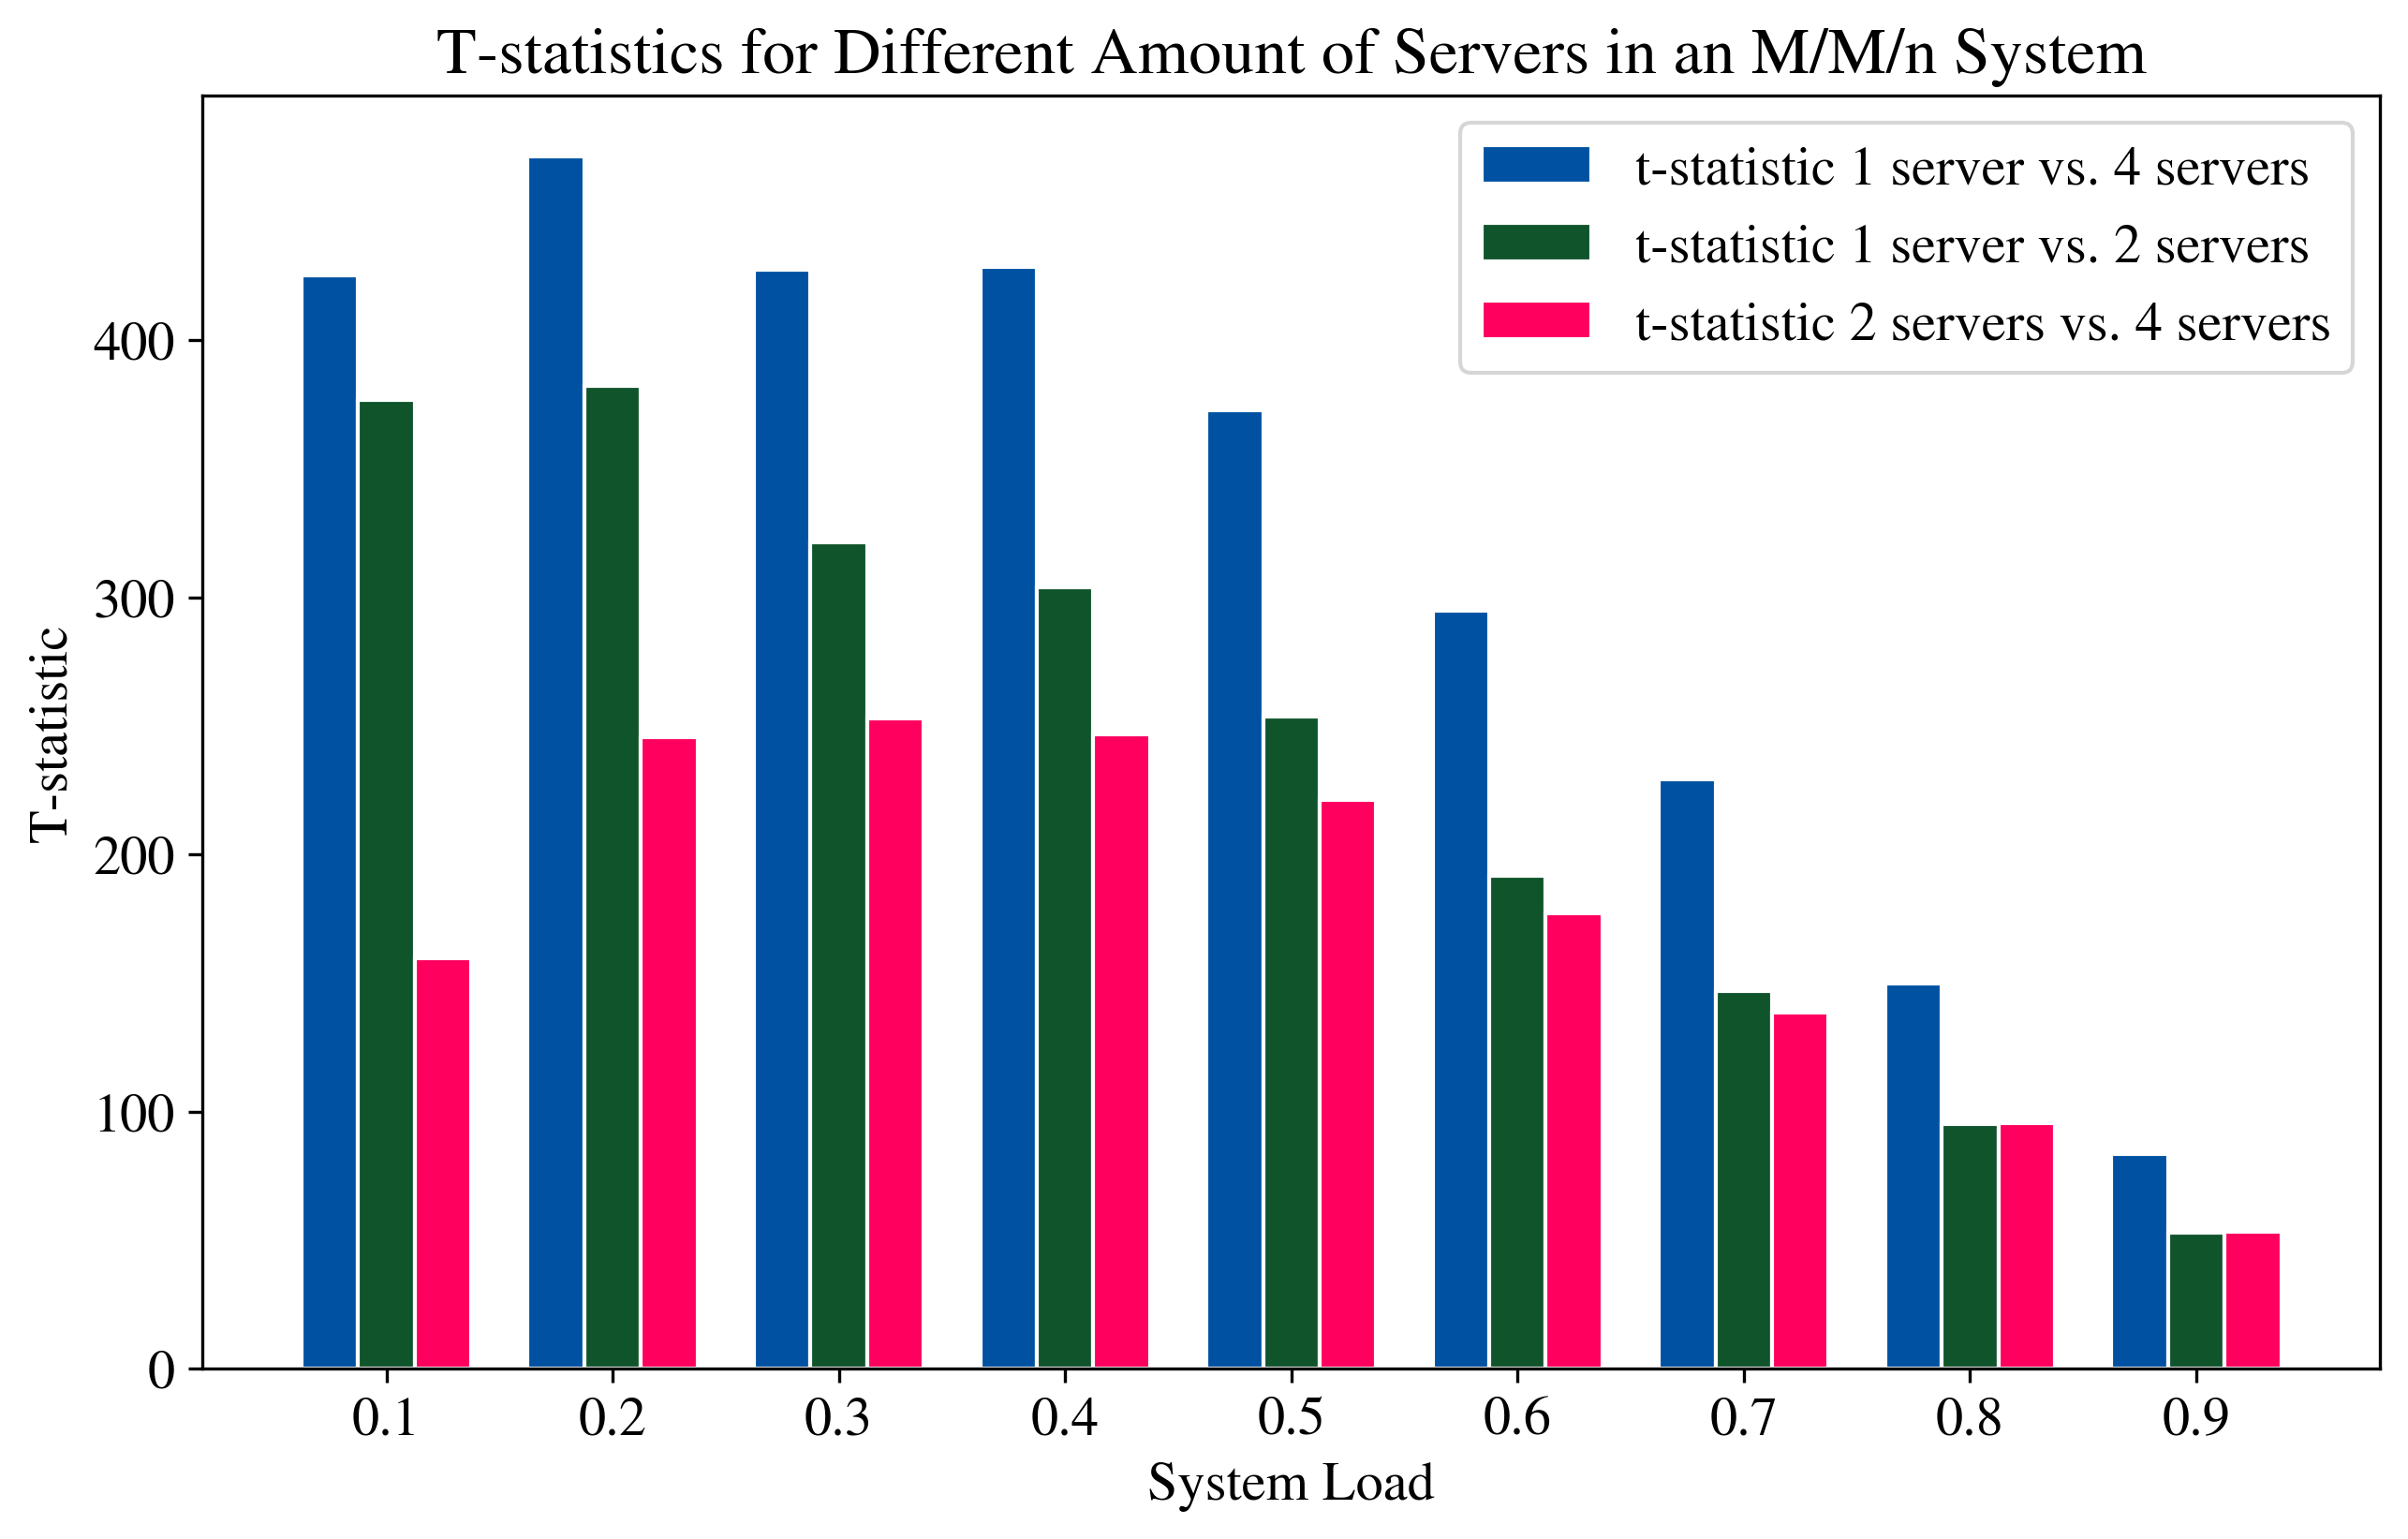

In [22]:
 # set width of bars
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(Anova_results))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

 
# Make the plot
fig = plt.figure(figsize=(10, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, ttest_14_results, color="#0051a2", width=barWidth, edgecolor='white', label='t-statistic 1 server vs. 4 servers')
ax.bar(r2, ttest_12_results, color="#10542c", width=barWidth, edgecolor='white', label='t-statistic 1 server vs. 2 servers')
ax.bar(r3, ttest_24_results, color="#ff005e", width=barWidth, edgecolor='white', label='t-statistic 2 servers vs. 4 servers')

# Add xticks on the middle of the group bars
plt.ylabel('T-statistic')
plt.xlabel('System Load')
plt.xticks([r + barWidth for r in range(len(Anova_results))], rhoVals)
plt.title('T-statistics for Different Amount of Servers in an M/M/n System')
    
# Create legend & Show graphic
plt.legend()
plt.show()
fig.savefig('figures/Tstat_comparison.pdf')


In [23]:
# boxplot of means per rho per amount of servers

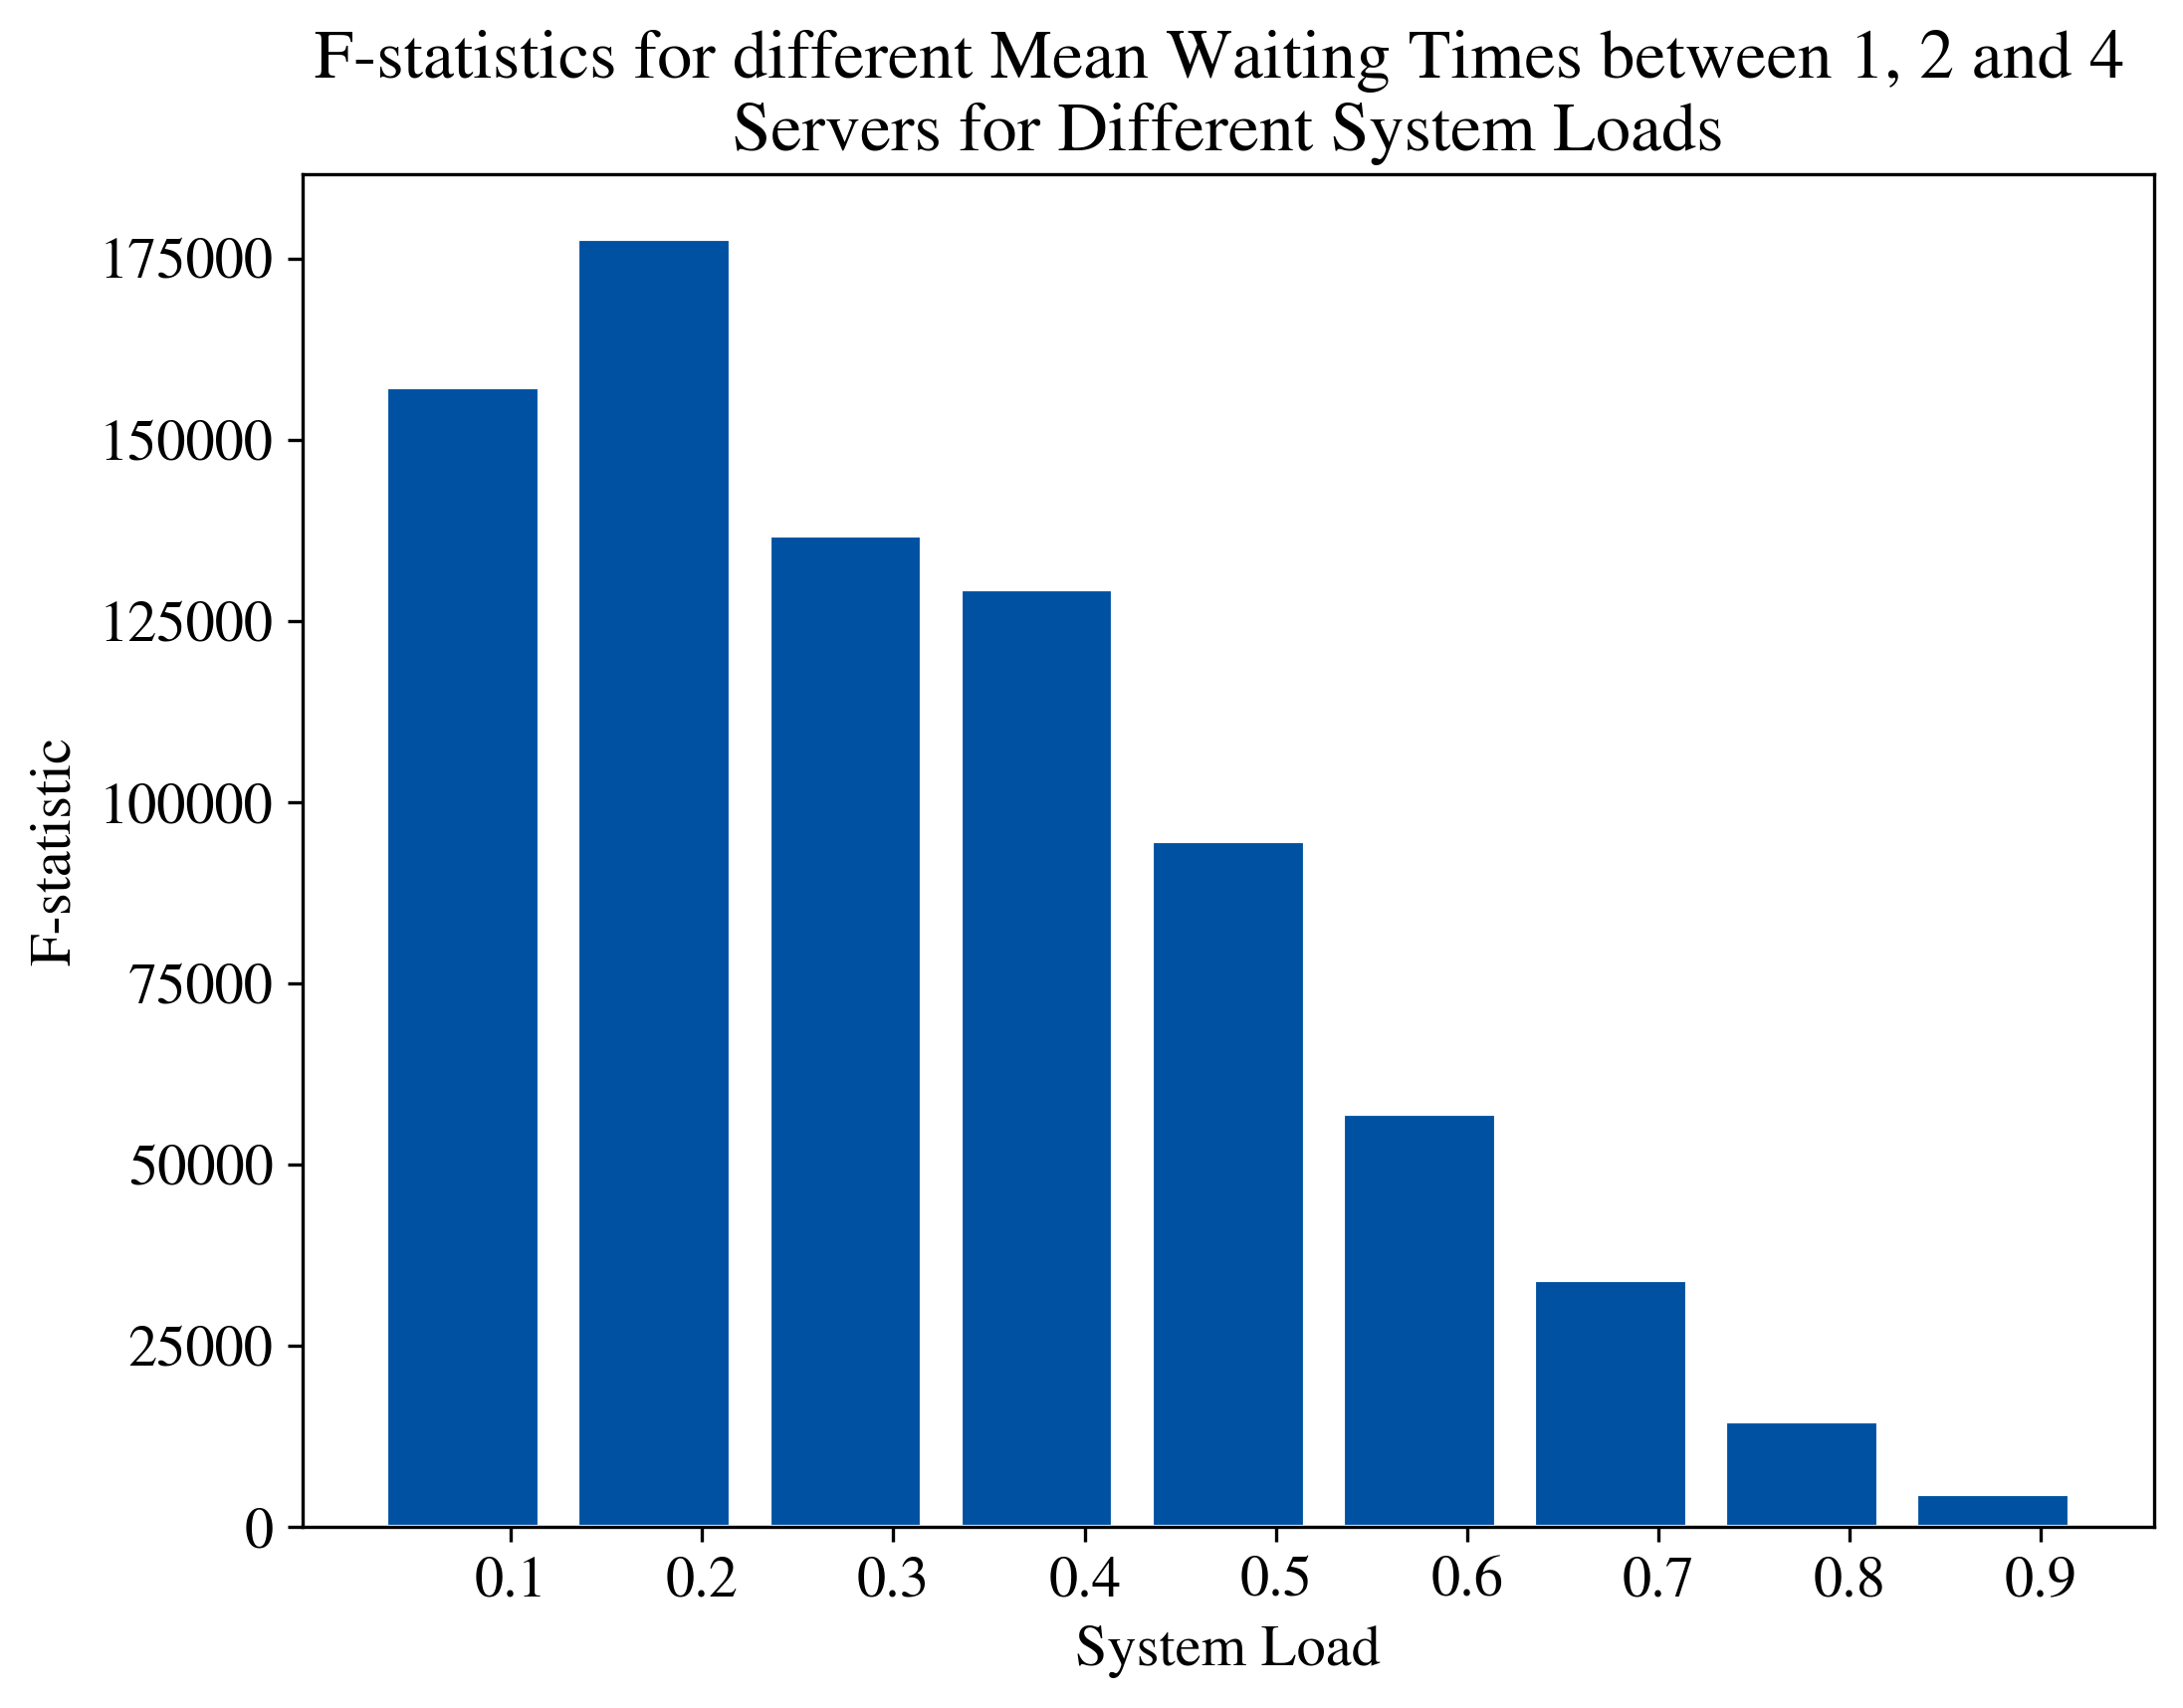

In [24]:
# set width of bars
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(Anova_results))

fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, Anova_results, color='#0051a2', edgecolor='white', label='')

# Add xticks on the middle of the group bars
plt.ylabel('F-statistic')
plt.xlabel('System Load')
plt.xticks([r + barWidth for r in range(len(Anova_results))], rhoVals)
plt.title('F-statistics for different Mean Waiting Times between 1, 2 and 4 \n Servers for Different System Loads ')
# Create legend & Show graphic
# plt.legend()
plt.show()
fig.savefig("figures/F_test.pdf")

In [25]:
# deterministic
d_simulator1 = queuSim(capacity=1, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, serviceDistribution="D")
d_simulator2 = queuSim(capacity=2, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, serviceDistribution="D")
d_simulator4 = queuSim(capacity=4, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, serviceDistribution="D")
# waitTimesX contain a list with sublists where each sublist contains all the customer waiting times
# of one simulation
d_waitTimes1 = d_simulator1.runSim()
d_waitTimes2 = d_simulator2.runSim()
d_waitTimes4 = d_simulator4.runSim()
# we compute the mean waiting times per simulation and store them in a list
d_means_1server = []
for sim in d_waitTimes1:
    d_means_1server.append(np.mean(sim))

d_means_2server = []
for sim in d_waitTimes2:
    d_means_2server.append(np.mean(sim))

d_means_4server = []
for sim in d_waitTimes4:
    d_means_4server.append(np.mean(sim))


In [26]:
# deterministic
h_simulator1 = queuSim(capacity=1, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, serviceDistribution="H")
h_simulator2 = queuSim(capacity=2, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, serviceDistribution="H")
h_simulator4 = queuSim(capacity=4, numSim=NUM_SIM, intervalCustomers = 2.1, serviceTime = 2, serviceDistribution="H")
# waitTimesX contain a list with sublists where each sublist contains all the customer waiting times
# of one simulation
h_waitTimes1 = h_simulator1.runSim()
h_waitTimes2 = h_simulator2.runSim()
h_waitTimes4 = h_simulator4.runSim()
# we compute the mean waiting times per simulation and store them in a list
h_means_1server = []
for sim in h_waitTimes1:
    h_means_1server.append(np.mean(sim))

h_means_2server = []
for sim in h_waitTimes2:
    h_means_2server.append(np.mean(sim))

h_means_4server = []
for sim in h_waitTimes4:
    h_means_4server.append(np.mean(sim))


In [27]:
np.mean(h_means_4server)

6.587689211574754

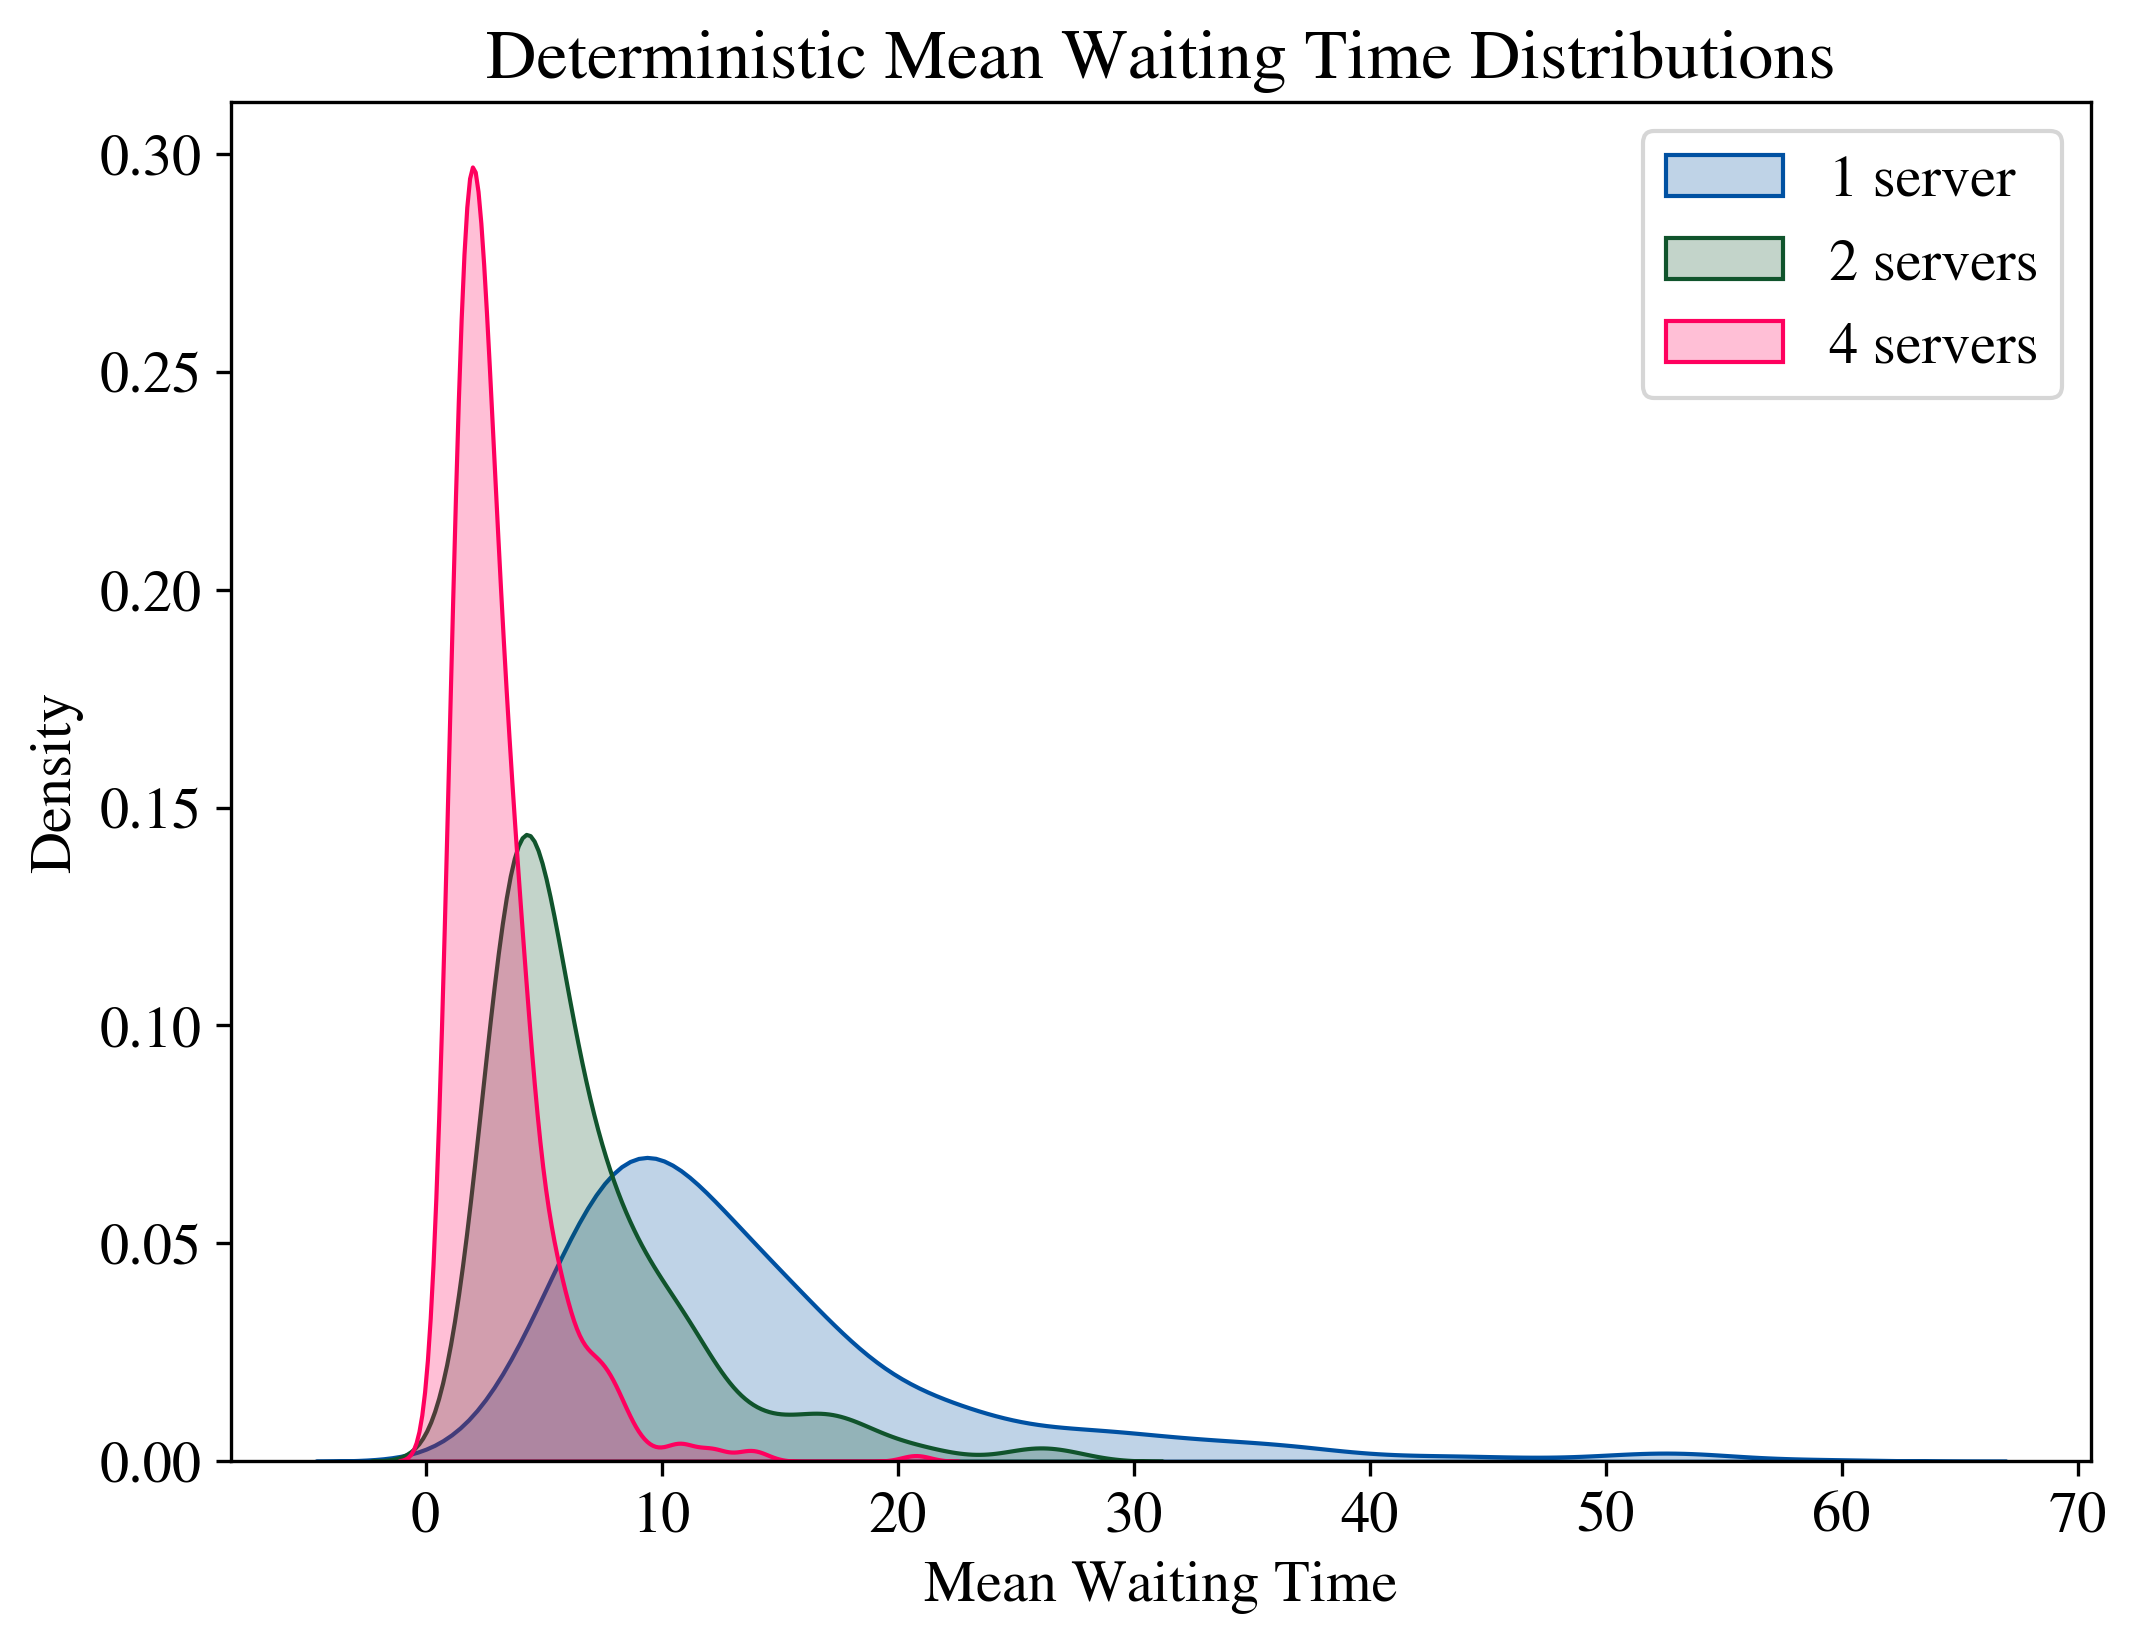

In [28]:
# COMPARING THE DISTRIBUTIONS of n = 1, 2, 4 servers for SJF 
# plotting the distributions (using kde) in one figure 
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(d_means_1server, shade=True, color="#0051a2", label='1 server')
ax = sns.kdeplot(d_means_2server, shade=True, color="#10542c", label='2 servers')
ax = sns.kdeplot(d_means_4server, shade=True, color="#ff005e", label='4 servers')
plt.xlabel('Mean Waiting Time')
plt.title('Deterministic Mean Waiting Time Distributions')
plt.legend()
plt.show()
fig.savefig("figures/d_distribution.pdf")


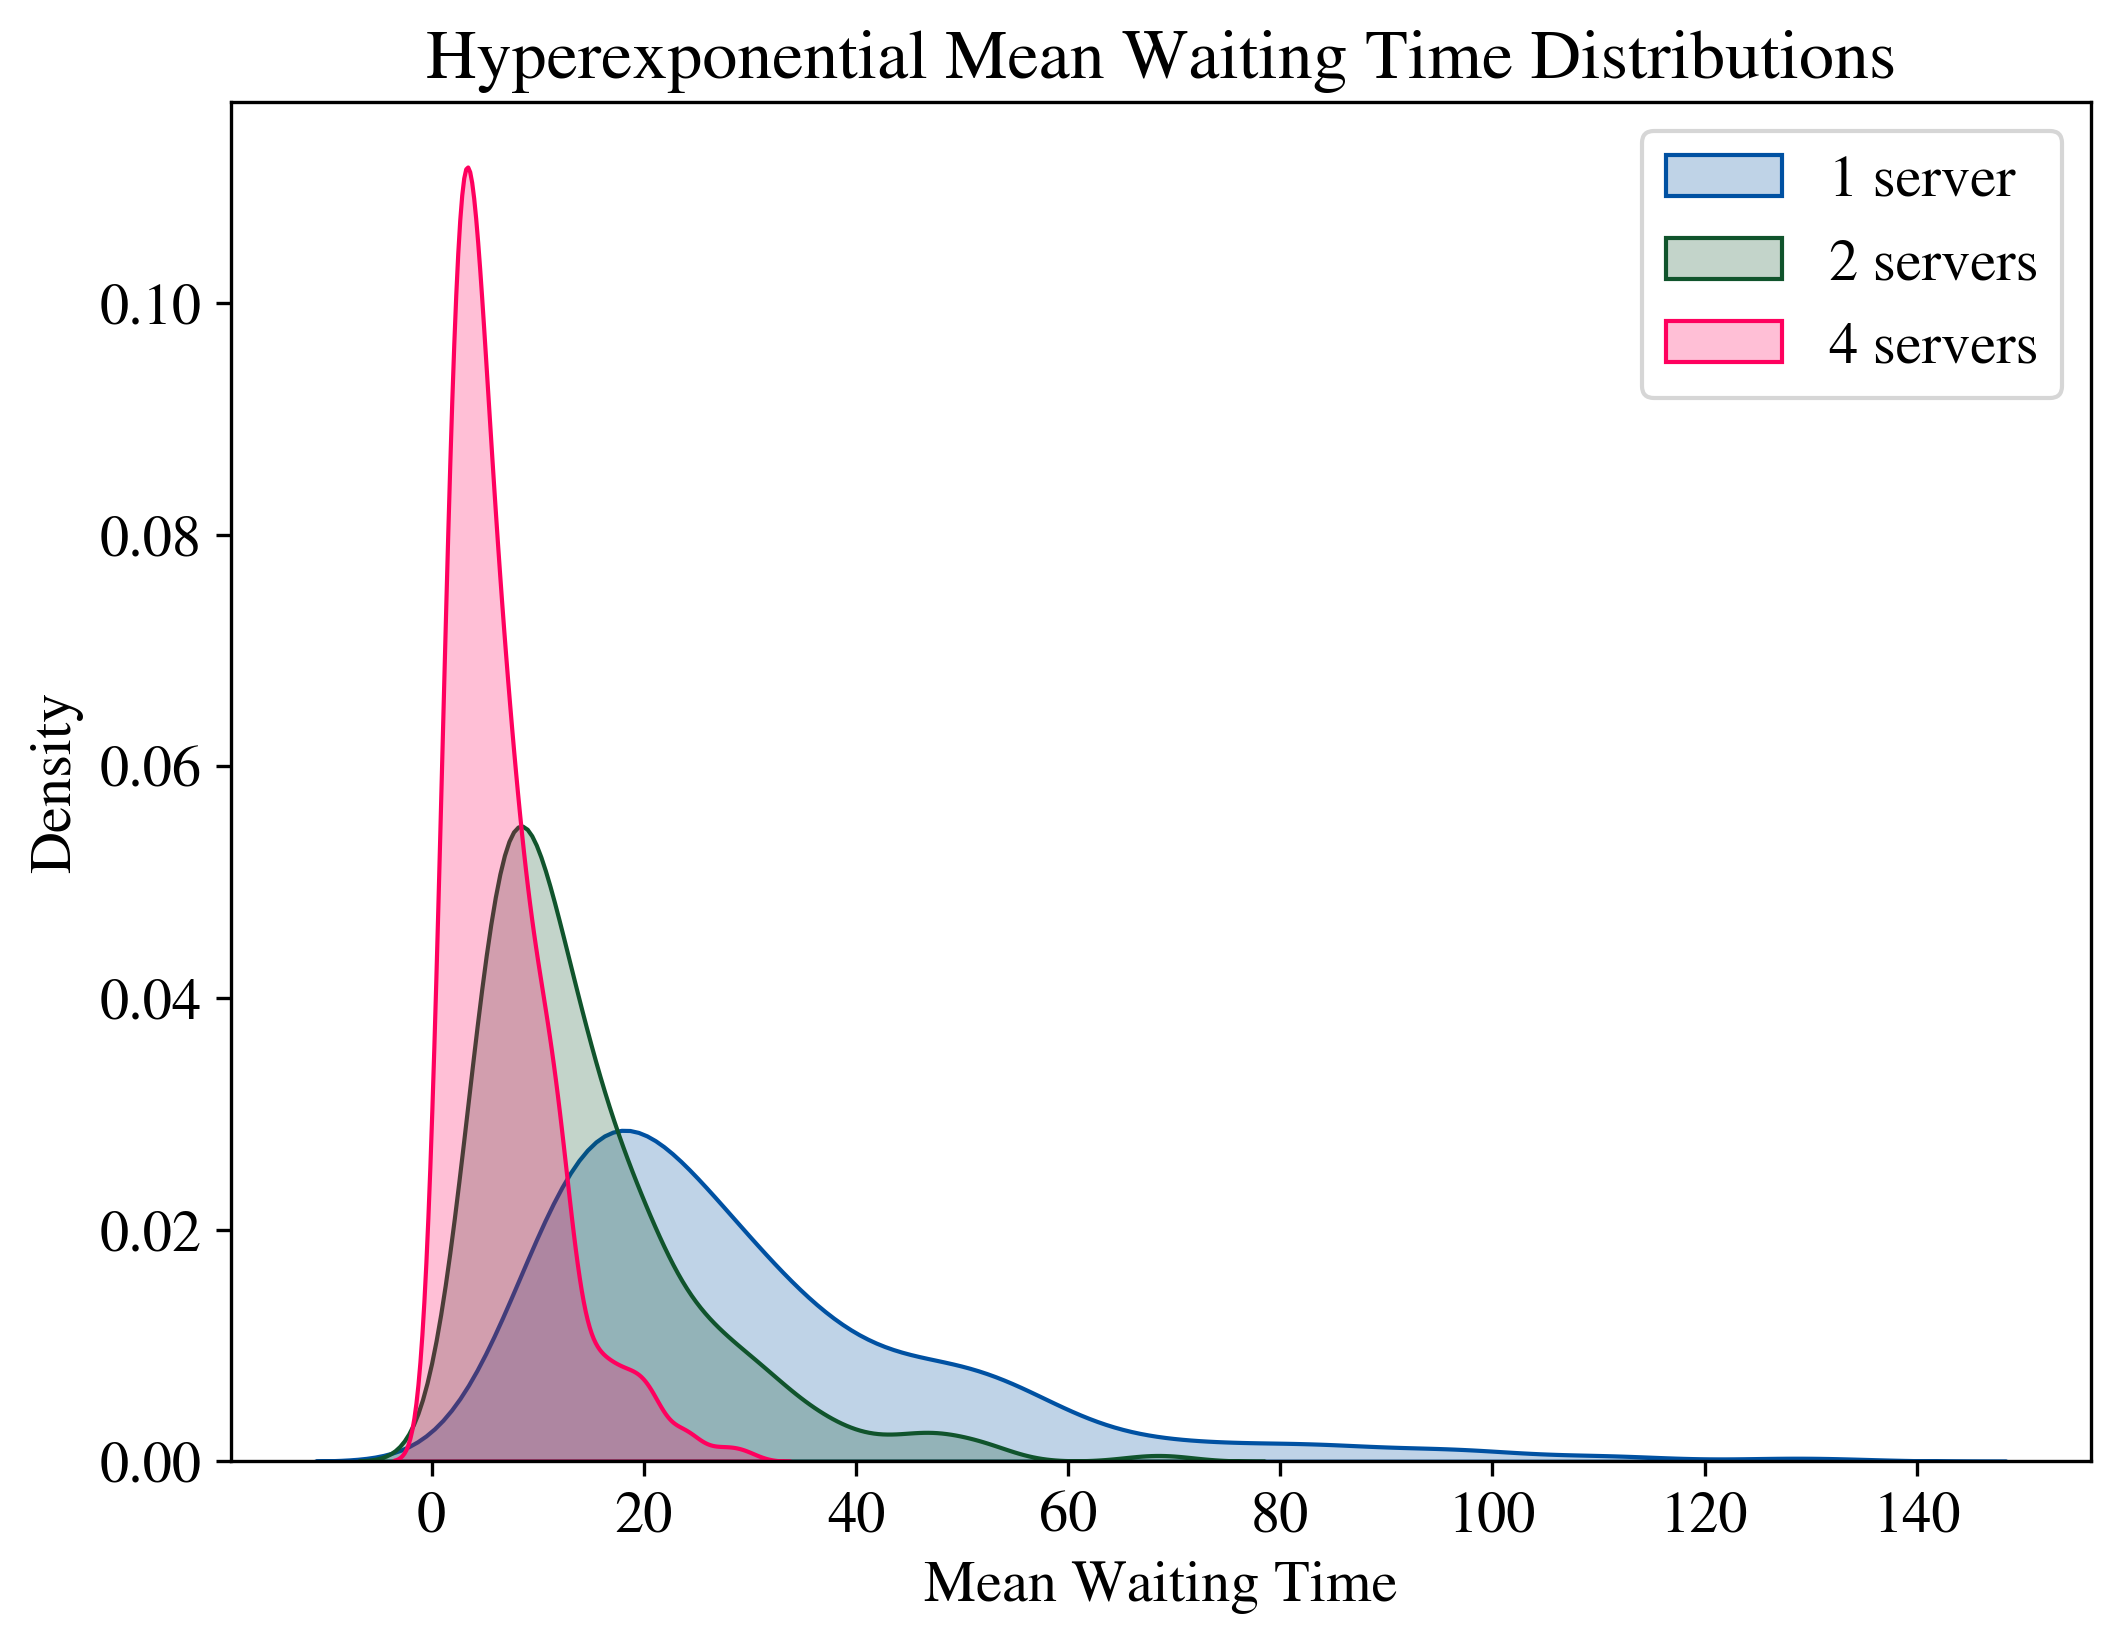

In [29]:
# COMPARING THE DISTRIBUTIONS of n = 1, 2, 4 servers for SJF 
# plotting the distributions (using kde) in one figure 
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(h_means_1server, shade=True, color="#0051a2", label='1 server')
ax = sns.kdeplot(h_means_2server, shade=True, color="#10542c", label='2 servers')
ax = sns.kdeplot(h_means_4server, shade=True, color="#ff005e", label='4 servers')
plt.xlabel('Mean Waiting Time')
plt.title('Hyperexponential Mean Waiting Time Distributions')
plt.legend()
plt.show()
fig.savefig("figures/h_distribution.pdf")


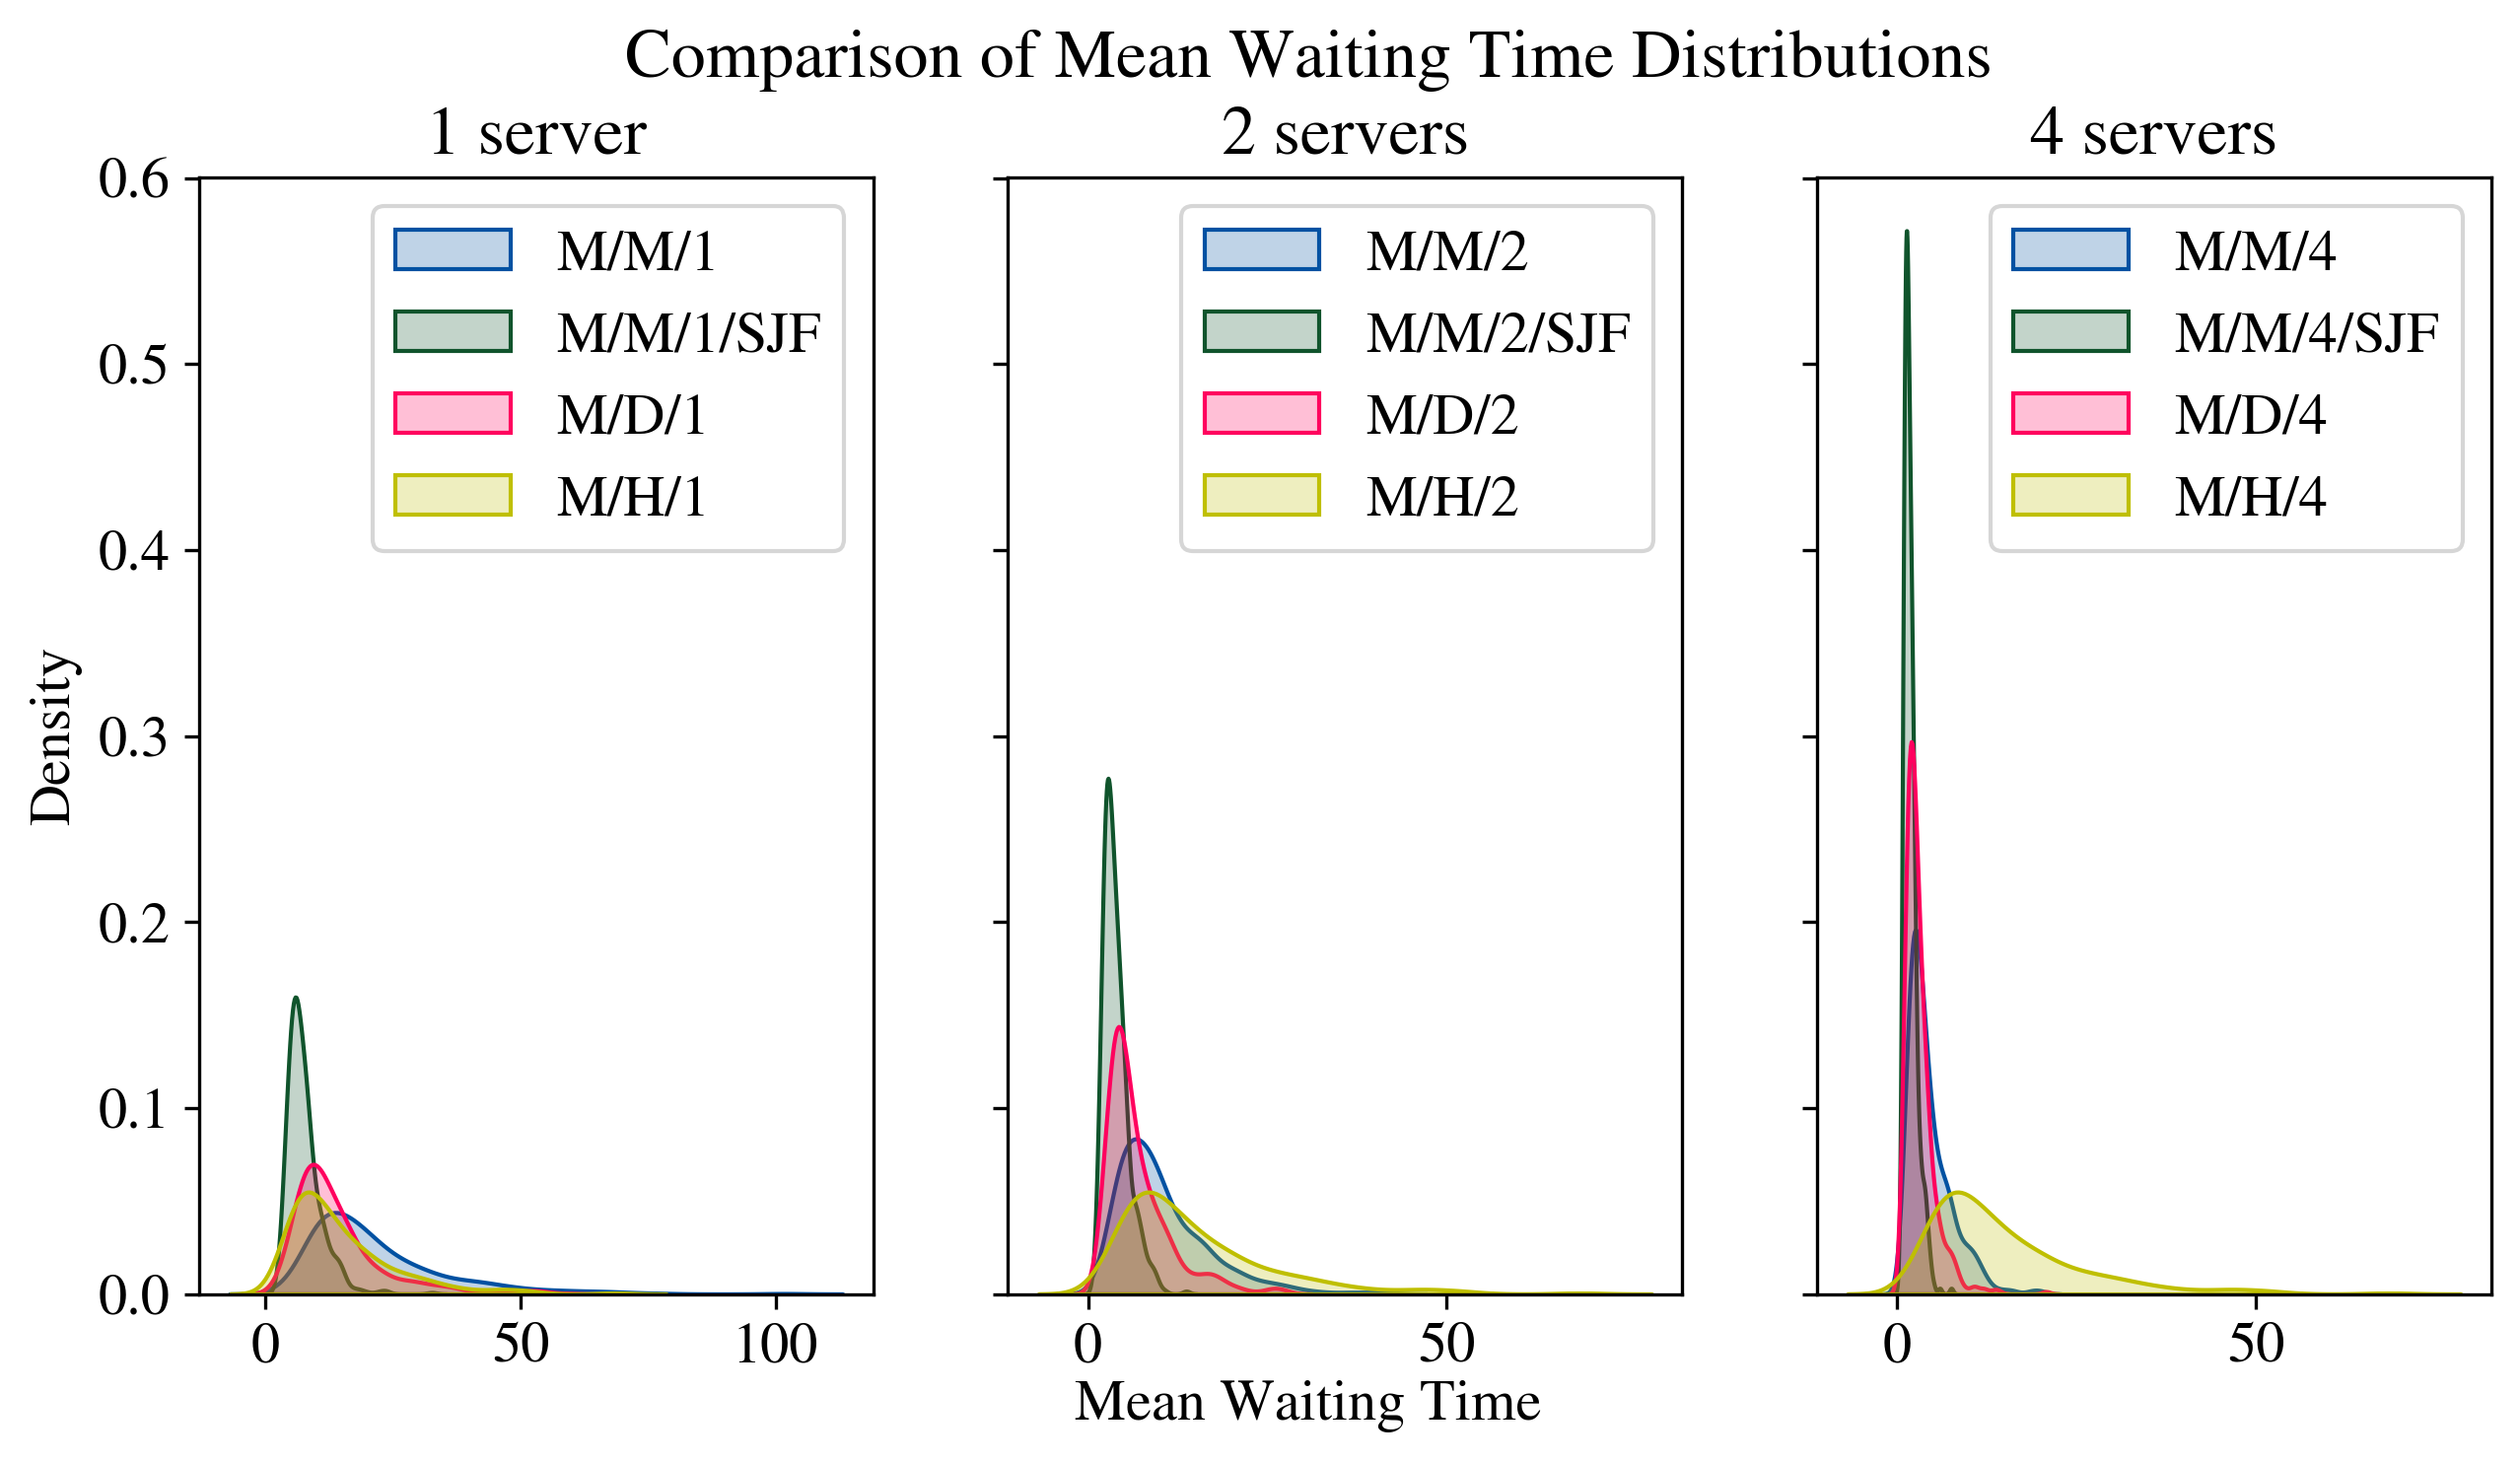

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5), dpi=300, sharey=True)
sns.kdeplot(ax=ax1, x=means_1server, shade=True, color="#0051a2", label='M/M/1')
sns.kdeplot(ax=ax1, x=sjf_means_1server, shade=True, color="#10542c", label='M/M/1/SJF')
sns.kdeplot(ax=ax1, x=d_means_1server, shade=True, color="#ff005e", label='M/D/1')
sns.kdeplot(ax=ax1, x=h_means_2server, shade=True, color="y", label='M/H/1')

sns.kdeplot(ax=ax2, x=means_2server, shade=True, color="#0051a2", label='M/M/2')
sns.kdeplot(ax=ax2, x=sjf_means_2server, shade=True, color="#10542c", label='M/M/2/SJF')
sns.kdeplot(ax=ax2, x=d_means_2server, shade=True, color="#ff005e", label='M/D/2')
sns.kdeplot(ax=ax2, x=h_means_2server, shade=True, color="y", label='M/H/2')

sns.kdeplot(ax=ax3, x=means_4server, shade=True, color="#0051a2", label='M/M/4')
sns.kdeplot(ax=ax3, x=sjf_means_4server, shade=True, color="#10542c", label='M/M/4/SJF')
sns.kdeplot(ax=ax3, x=d_means_4server, shade=True, color="#ff005e", label='M/D/4')
sns.kdeplot(ax=ax3, x=h_means_2server, shade=True, color="y", label='M/H/4')

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title('1 server')
ax2.set_title('2 servers')
ax3.set_title('4 servers')
fig.text(0.5, 0.04,  'Mean Waiting Time', ha='center')
fig.suptitle('Comparison of Mean Waiting Time Distributions')
plt.show()
fig.savefig('figures/all_distr_compared.pdf')

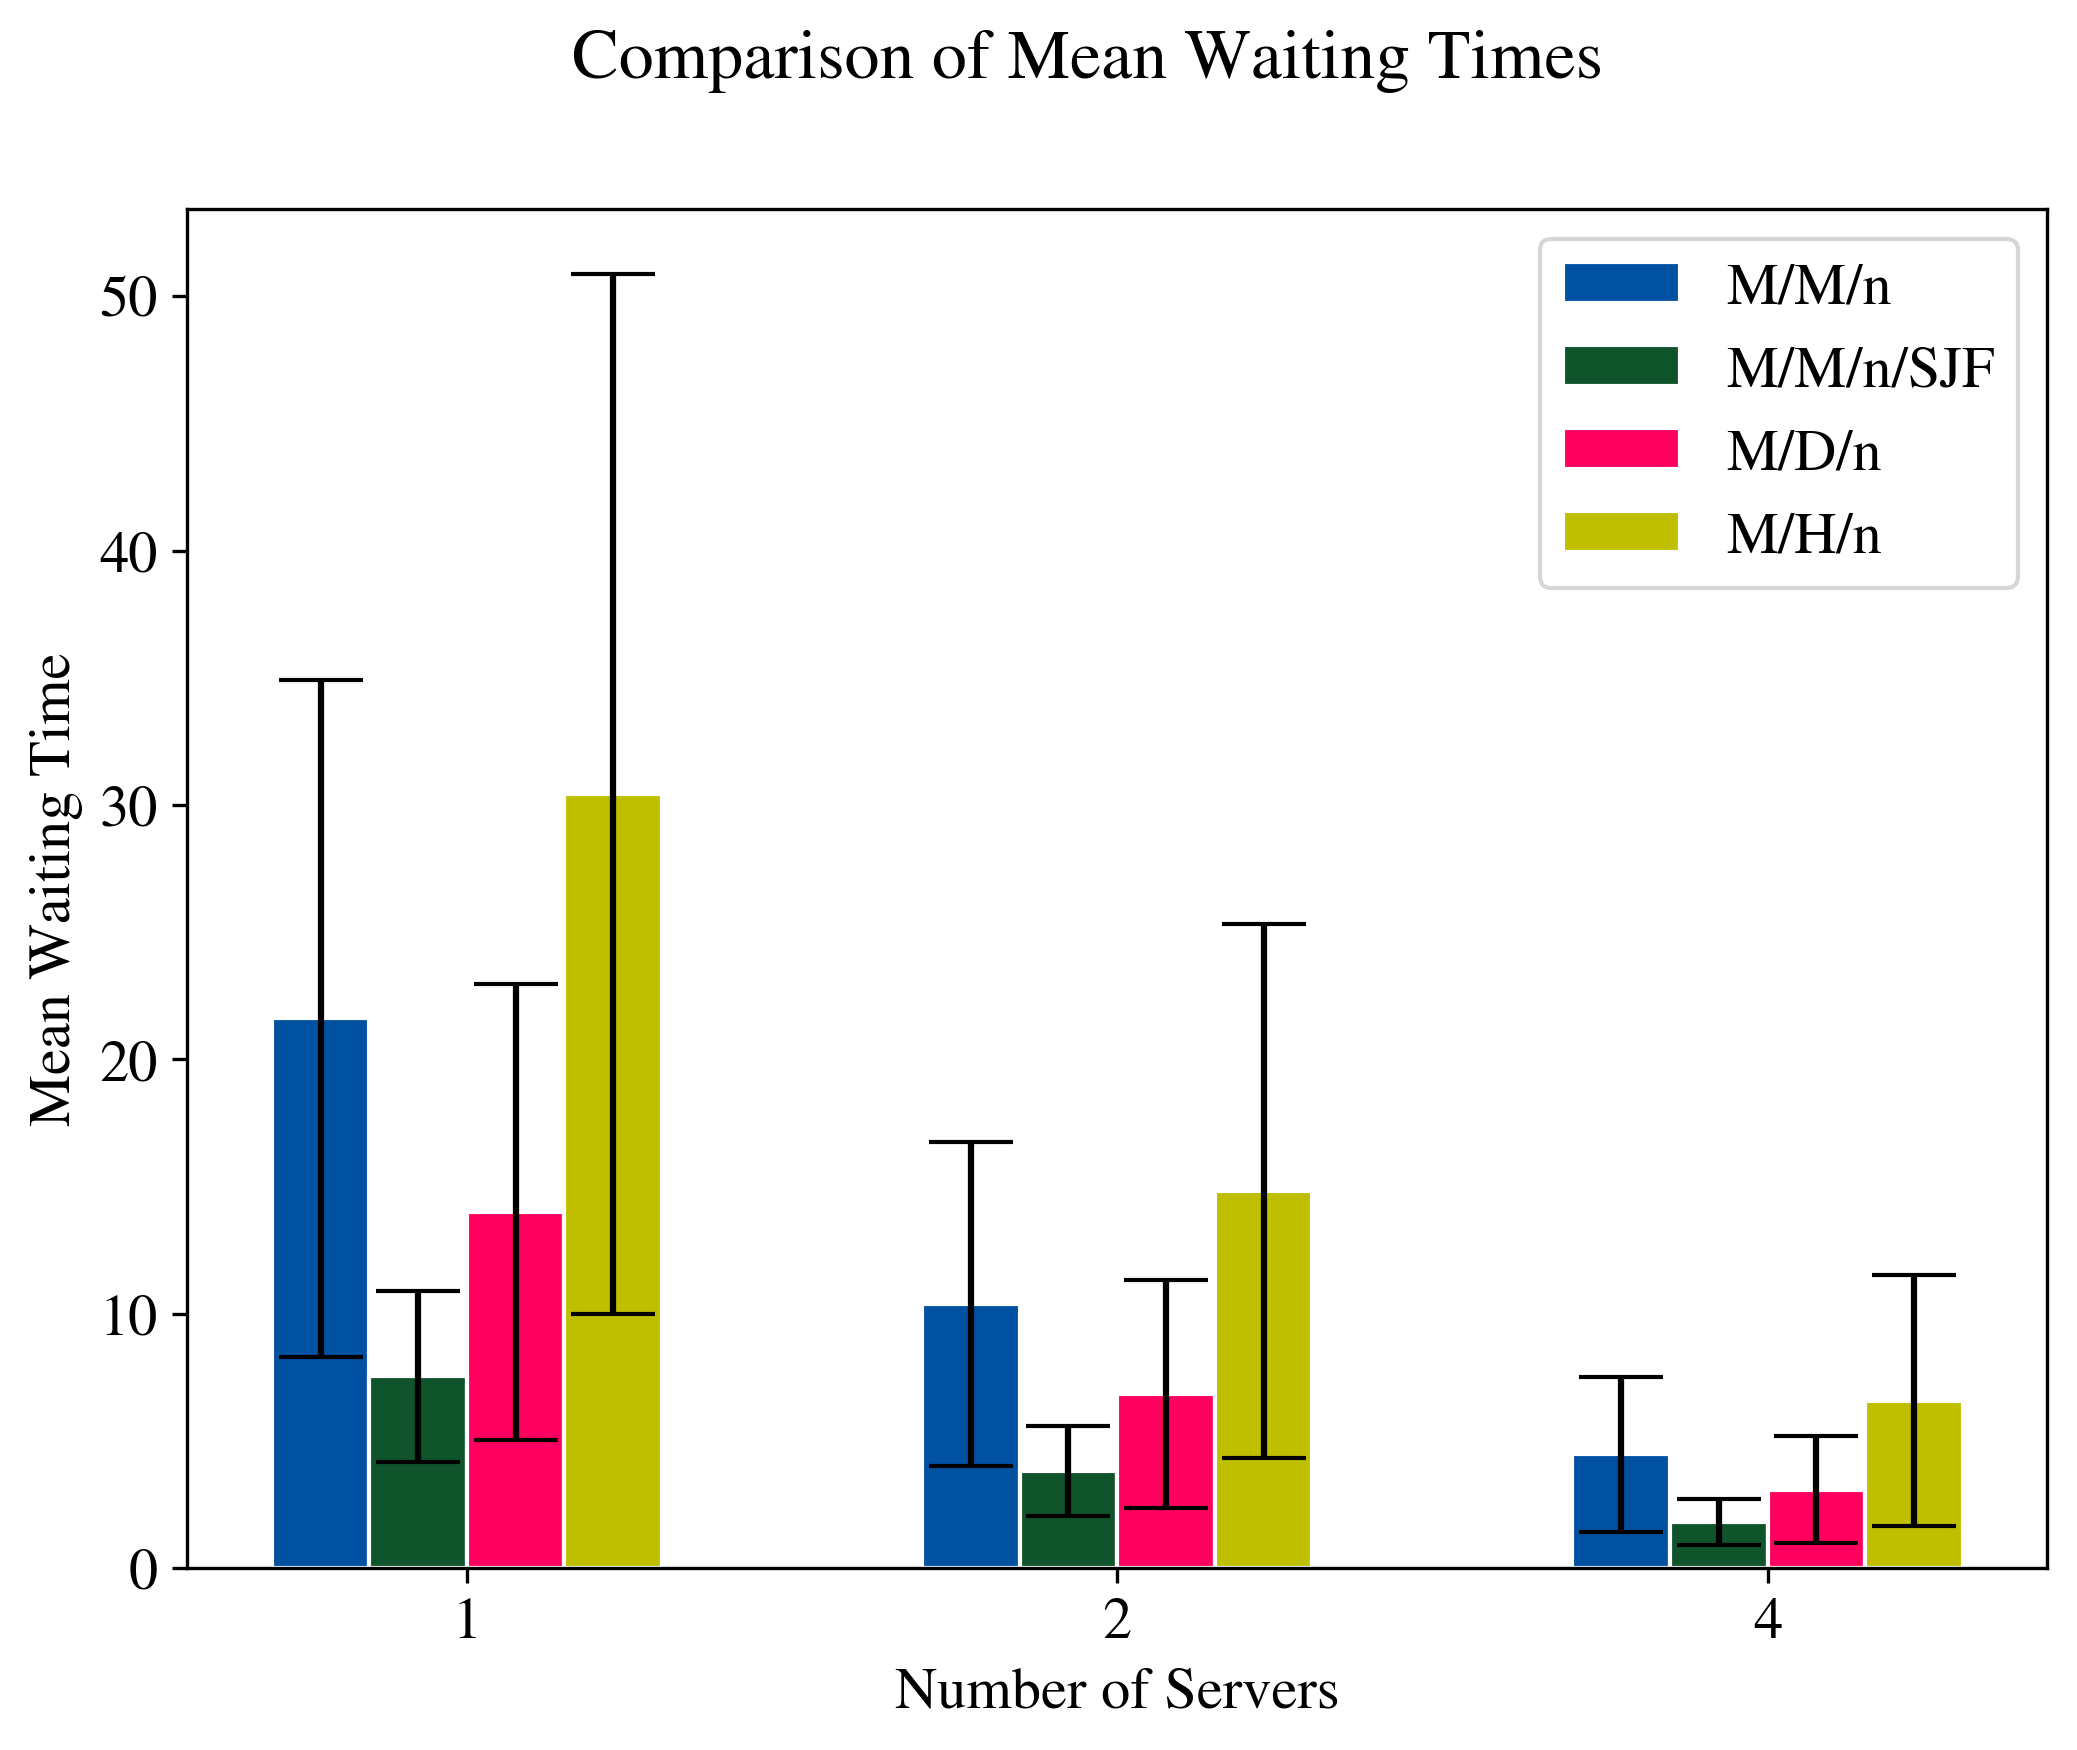

In [31]:
# Comparing means of all strategies
means_1server
means_2server
means_4server

h_means_1server
h_means_2server
h_means_4server

d_means_1server
d_means_2server
d_means_4server

sjf_means_1server
sjf_means_2server
sjf_means_4server

# set width of bars
barWidth = 0.15

bar1 = [np.mean(means_1server), np.mean(means_2server), np.mean(means_4server)]
bar2 = [np.mean(sjf_means_1server), np.mean(sjf_means_2server), np.mean(sjf_means_4server)]
bar3 = [np.mean(d_means_1server), np.mean(d_means_2server), np.mean(d_means_4server)]
bar4 = [np.mean(h_means_1server), np.mean(h_means_2server), np.mean(h_means_4server)]

err1 = [np.std(means_1server), np.std(means_2server), np.std(means_4server)]
err2 = [np.std(sjf_means_1server), np.std(sjf_means_2server), np.std(sjf_means_4server)]
err3 = [np.std(d_means_1server), np.std(d_means_2server), np.std(d_means_4server)]
err4 = [np.std(h_means_1server), np.std(h_means_2server), np.std(h_means_4server)]

# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar1, yerr = err1, color="#0051a2", width=barWidth, edgecolor='white', label='M/M/n', capsize=10)
ax.bar(r2, bar2, yerr = err2, color="#10542c", width=barWidth, edgecolor='white', label='M/M/n/SJF', capsize=10)
ax.bar(r3, bar3, yerr = err3, color="#ff005e", width=barWidth, edgecolor='white', label='M/D/n', capsize=10)
ax.bar(r4, bar4, yerr = err4, color='y', width=barWidth, edgecolor='white', label='M/H/n', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Waiting Time')
plt.xlabel('Number of Servers')
plt.xticks([r + 1.5*barWidth for r in range(3)], [1,2,4])
 
fig.suptitle('Comparison of Mean Waiting Times')
# Create legend & Show graphic
plt.legend()
plt.show()
fig.savefig('figures/all_means_compared.pdf')

In [32]:
#Statistical tests:

print('M/D/1 vs. M/M/1/SJF: ', st.ttest_ind(d_means_1server, sjf_means_1server))
print('M/D/1 vs. M/M/1: ', st.ttest_ind(d_means_1server, means_1server))
print('M/M/1 vs. M/H/1: ', st.ttest_ind(means_1server, h_means_1server))
print('M/M/1 vs. M/D/1 vs. M/H/1 vs M/M/1/SJF (ANOVA): ', st.f_oneway(means_1server, d_means_1server, h_means_1server, sjf_means_1server))
print()

print('M/M/1 vs. M/M/1/SJF: ', st.ttest_ind(means_2server, sjf_means_2server))
print('M/M/1 vs. M/D/1: ', st.ttest_ind(means_2server, d_means_2server))
print('M/M/1 vs. M/H/1: ', st.ttest_ind(means_2server, h_means_2server))
print('M/D/1 vs. M/H/1: ', st.ttest_ind(d_means_2server, h_means_2server))
print('M/M/1 vs. M/D/1 vs. M/H/1 (ANOVA): ', st.f_oneway(means_2server, d_means_2server, h_means_2server))
print()

print('M/M/1 vs. M/M/1/SJF: ', st.ttest_ind(means_4server, sjf_means_4server))
print('M/M/1 vs. M/D/1: ', st.ttest_ind(means_4server, d_means_4server))
print('M/M/1 vs. M/H/1: ', st.ttest_ind(means_4server, h_means_4server))
print('M/D/1 vs. M/H/1: ', st.ttest_ind(d_means_4server, h_means_4server))
print('M/M/1 vs. M/D/1 vs. M/H/1 (ANOVA): ', st.f_oneway(means_4server, d_means_4server, h_means_4server))
print()

M/D/1 vs. M/M/1/SJF:  Ttest_indResult(statistic=15.140332974807121, pvalue=9.054476185650923e-47)
M/D/1 vs. M/M/1:  Ttest_indResult(statistic=-10.563776572183956, pvalue=8.44508712812151e-25)
M/M/1 vs. M/H/1:  Ttest_indResult(statistic=-8.078556699926185, pvalue=1.880449300445666e-15)
M/M/1 vs. M/D/1 vs. M/H/1 vs M/M/1/SJF (ANOVA):  F_onewayResult(statistic=283.22148507121926, pvalue=3.7594051153317226e-153)

M/M/1 vs. M/M/1/SJF:  Ttest_indResult(statistic=22.097936577331097, pvalue=2.1152102452039375e-88)
M/M/1 vs. M/D/1:  Ttest_indResult(statistic=10.067637651608917, pvalue=8.986138001960965e-23)
M/M/1 vs. M/H/1:  Ttest_indResult(statistic=-8.09779299886323, pvalue=1.6214665632152968e-15)
M/D/1 vs. M/H/1:  Ttest_indResult(statistic=-15.57378229941222, pvalue=4.0625869597069506e-49)
M/M/1 vs. M/D/1 vs. M/H/1 (ANOVA):  F_onewayResult(statistic=139.4161741566188, pvalue=2.993287431011215e-56)

M/M/1 vs. M/M/1/SJF:  Ttest_indResult(statistic=18.695503932122953, pvalue=4.1863018576332667e